In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!nvidia-smi

Thu May 16 10:22:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [4]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 325 (delta 165), reused 263 (delta 162), pack-reused 0
Receiving objects: 100% (325/325), 2.23 MiB | 13.08 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/kaggle/working/yolov9


In [5]:
!pip3 install -q roboflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.1.6 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.2 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is i

In [6]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [7]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 May 16 10:23 .
drwxr-xr-x 5 root root      4096 May 16 10:23 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [8]:
%cd {HOME}/yolov9

/kaggle/working/yolov9


In [9]:
from roboflow import Roboflow
rf = Roboflow(api_key="*DATASET_API_KEY*")
project = rf.workspace("engdes2").project("metal-surface-defects-rmbhy")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Metal-Surface-Defects-2 in yolov9:: 100%|██████████| 7956/7956 [00:01<00:00, 7574.33it/s]


In [10]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 100 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {HOME}/yolov9/Metal-Surface-Defects-2/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/kaggle/working/yolov9
2024-05-16 10:24:34.468920: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 10:24:34.469025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 10:24:34.718168: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=/kaggle/working/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/kaggle/working/yolov9/Metal-Surface-Defects-2/data.yaml

In [11]:
!ls {HOME}/yolov9/runs/train/exp

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
events.out.tfevents.1715855118.f6533814945c.113.0  val_batch0_pred.jpg
hyp.yaml					   val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
opt.yaml					   val_batch2_pred.jpg
results.csv					   weights


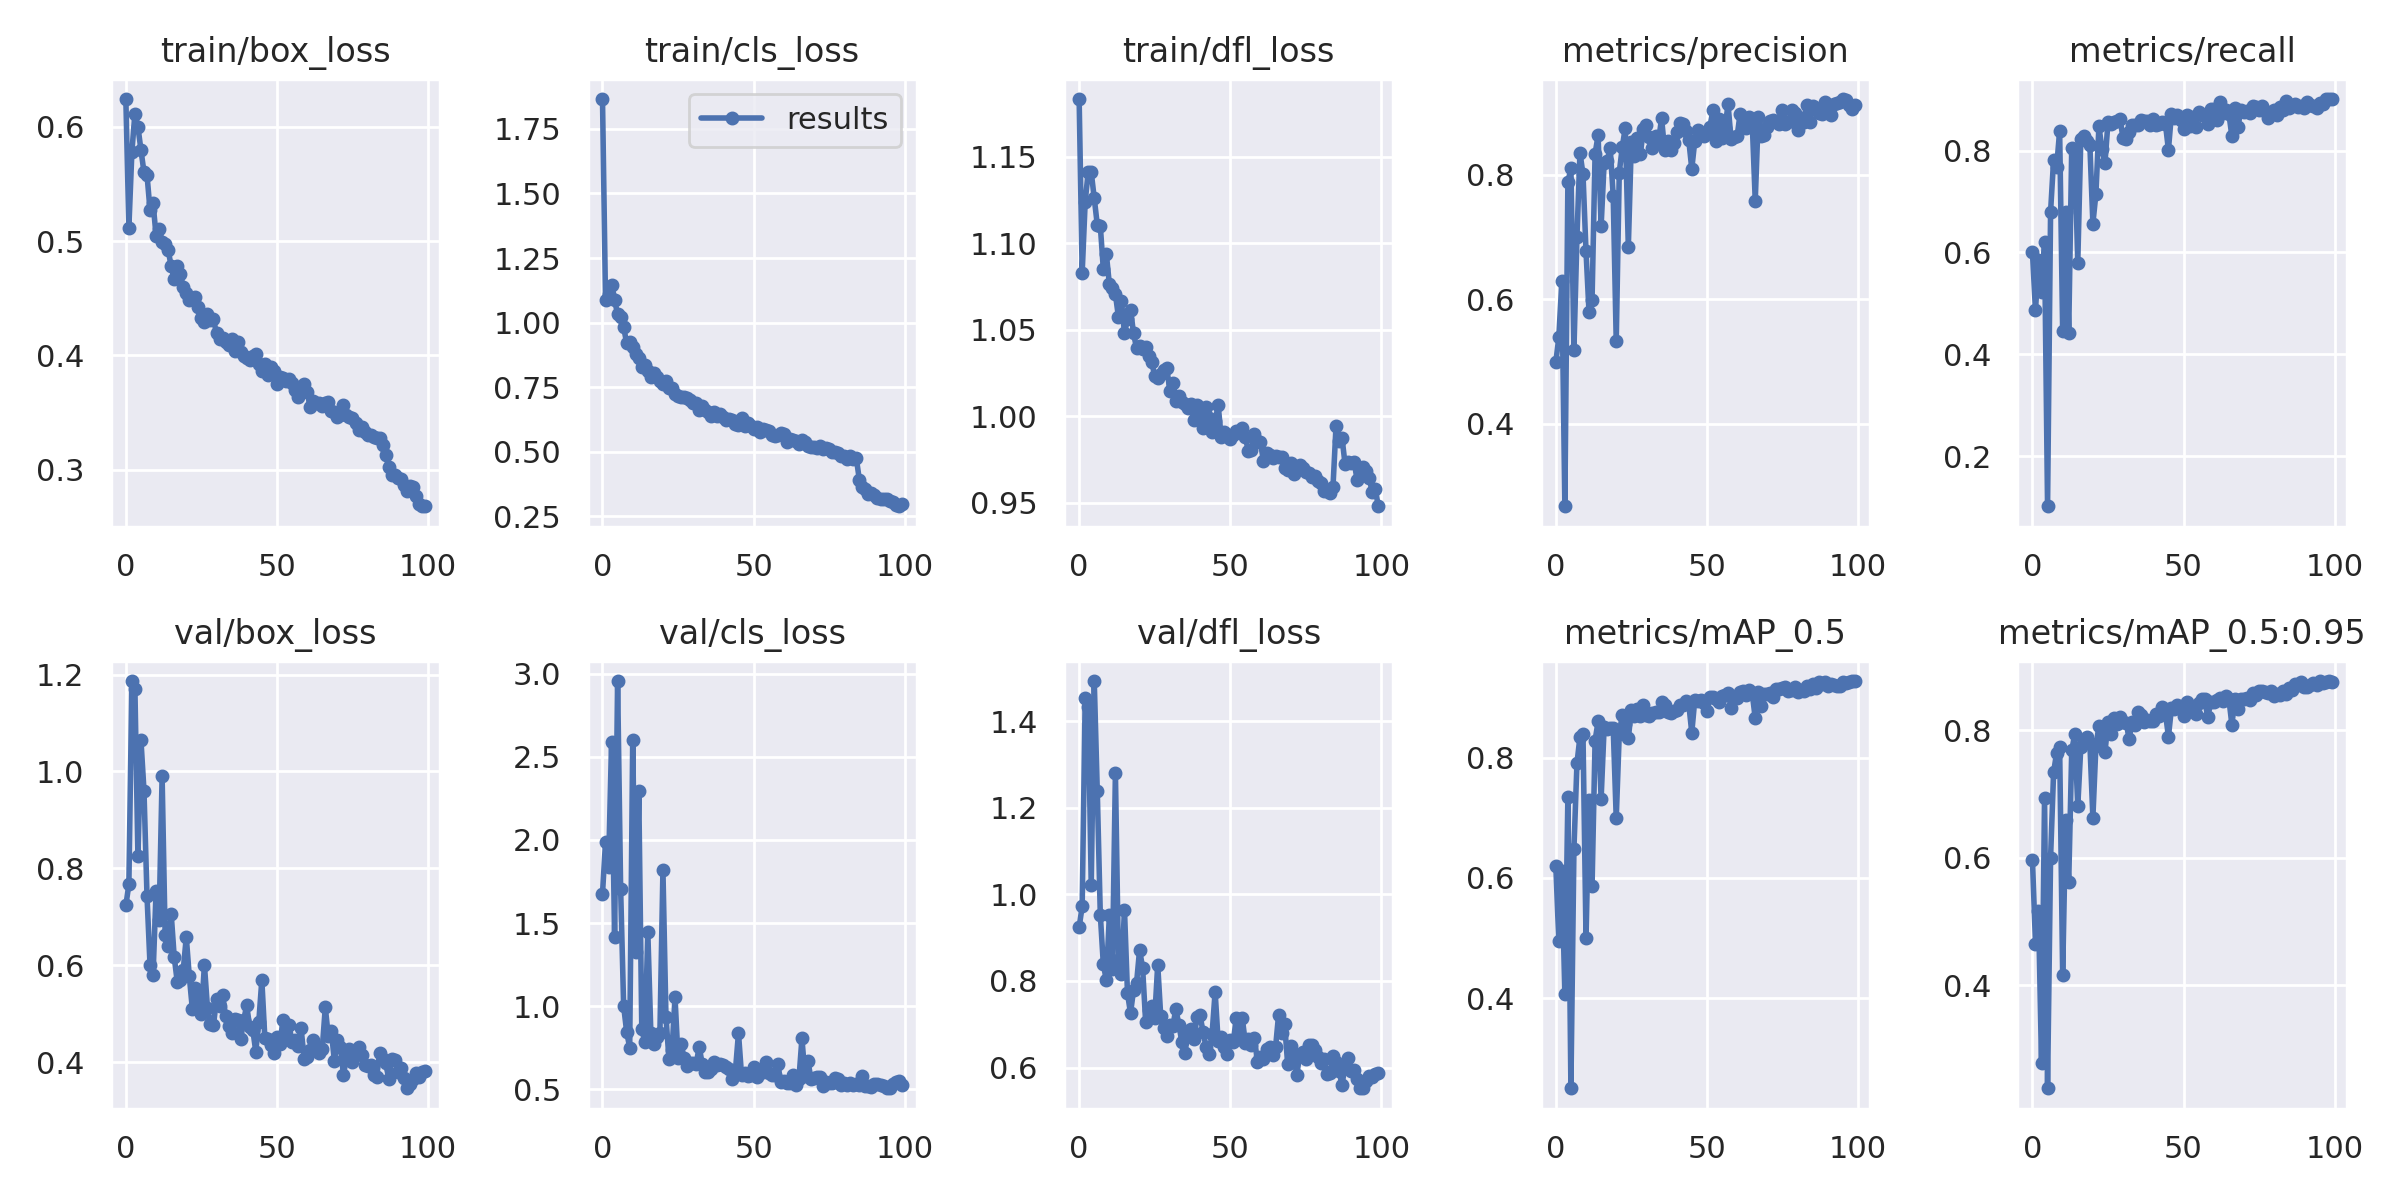

In [12]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

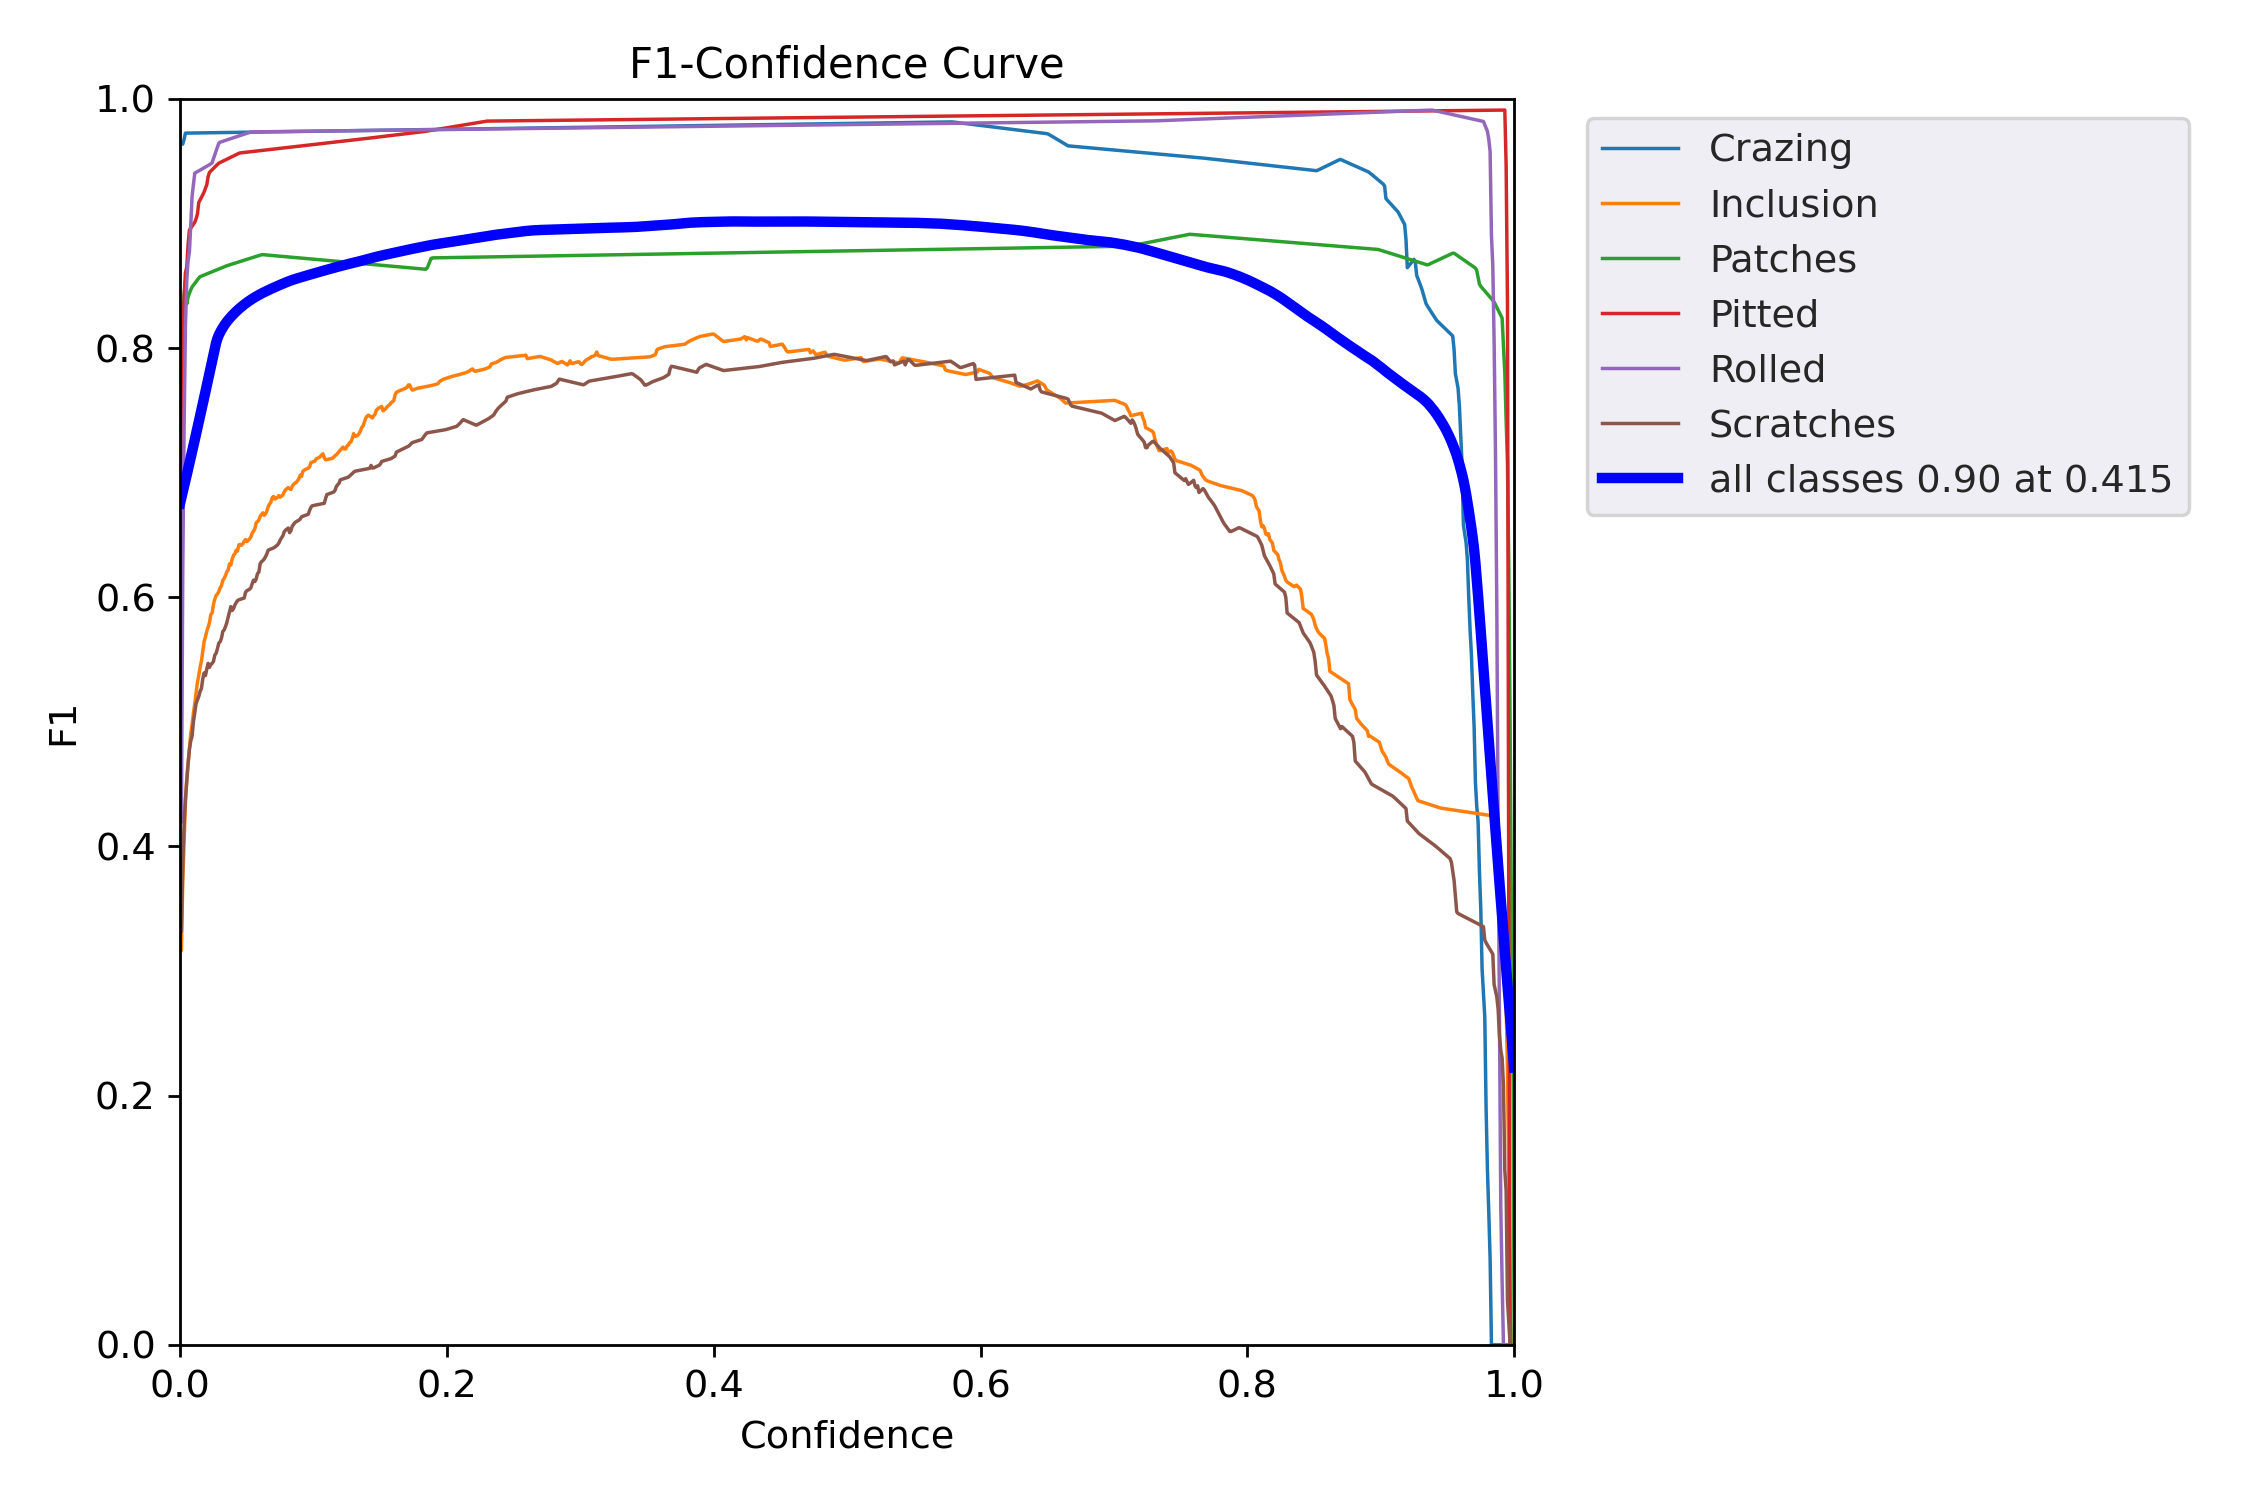

In [13]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/F1_curve.png", width=1000)

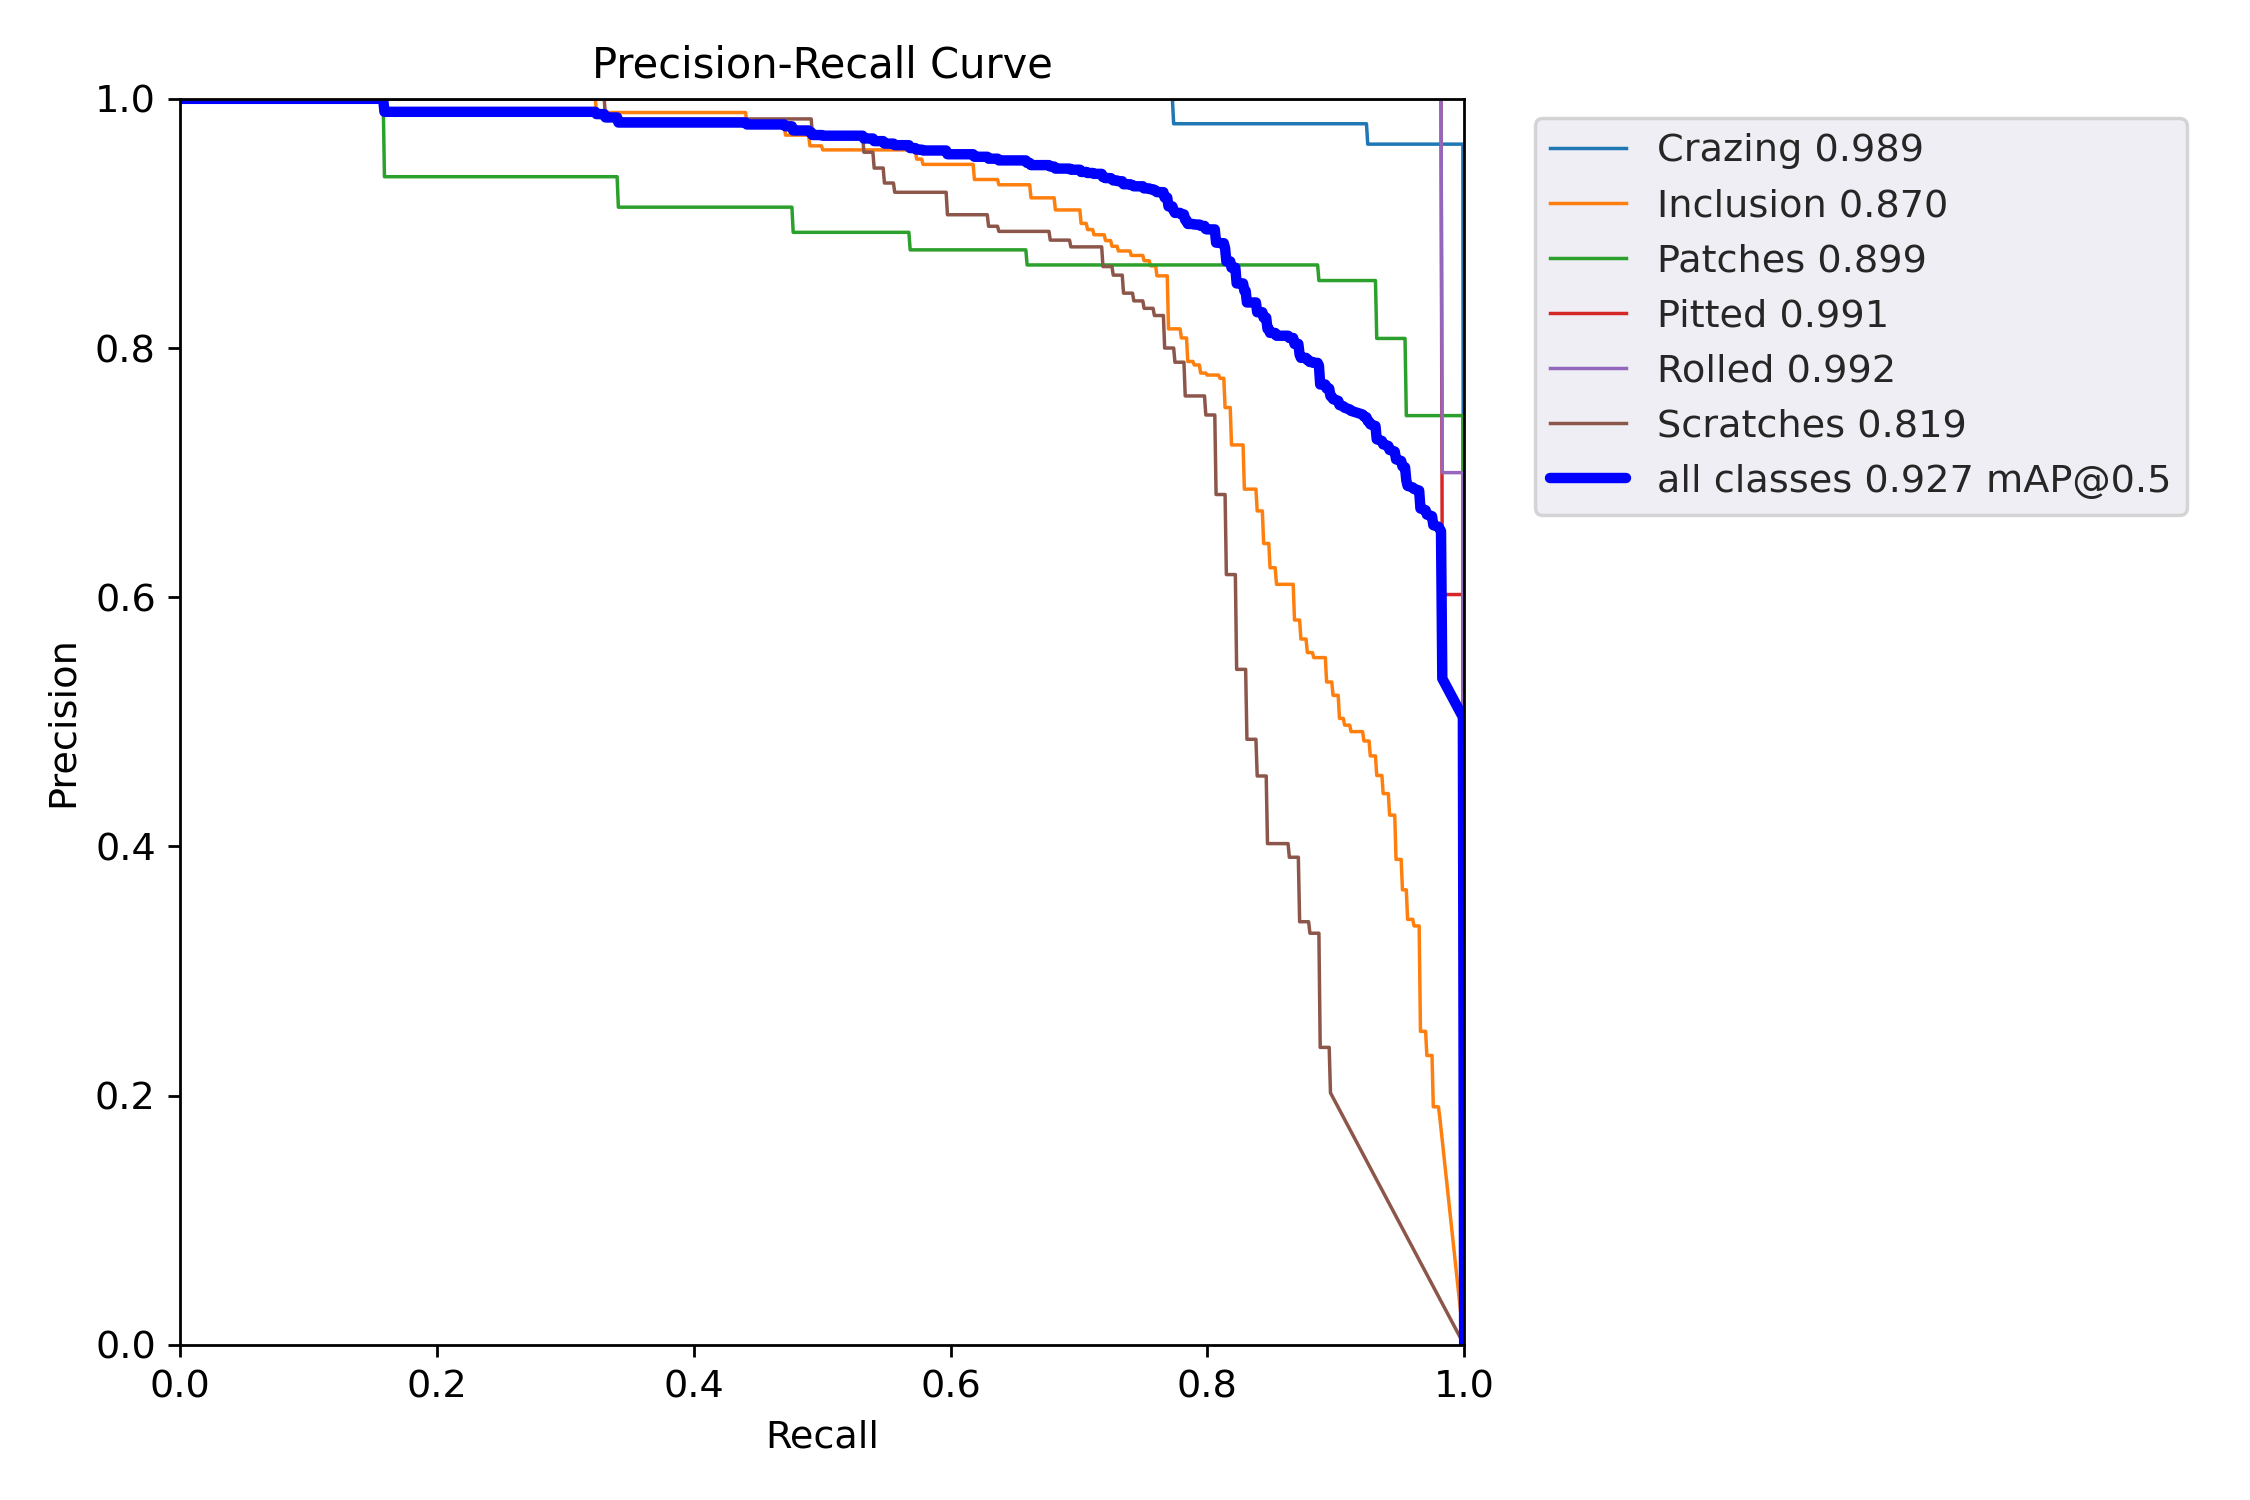

In [15]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/PR_curve.png", width=1000)

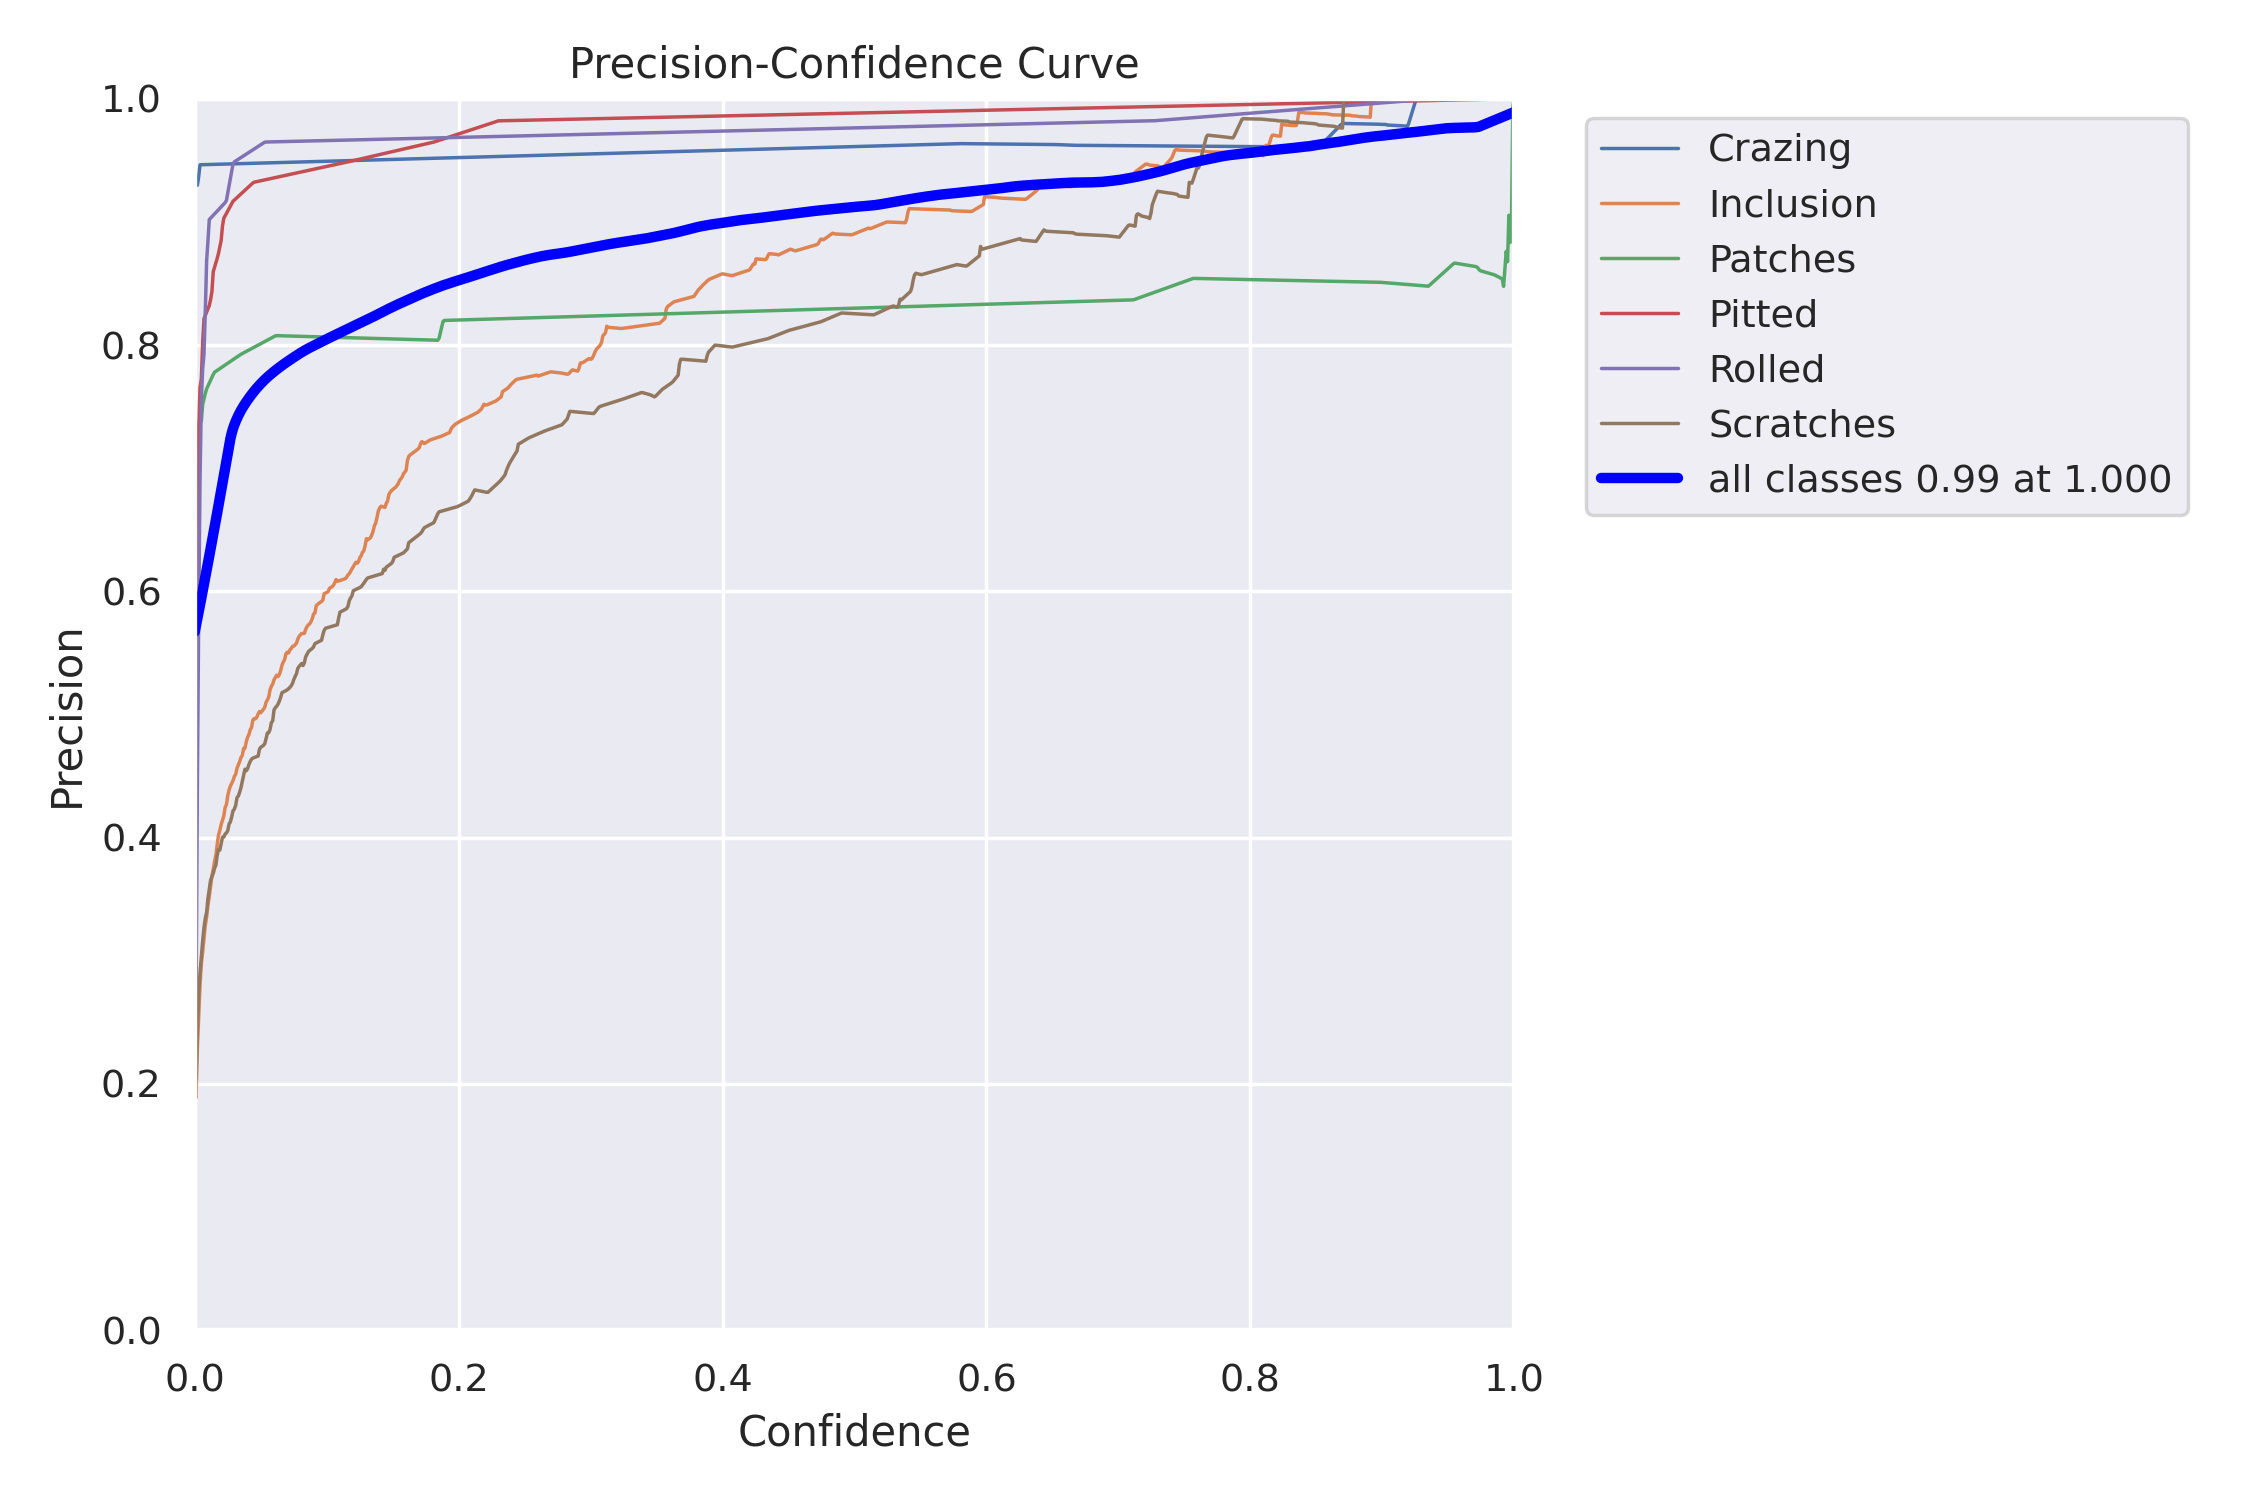

In [16]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/P_curve.png", width=1000)

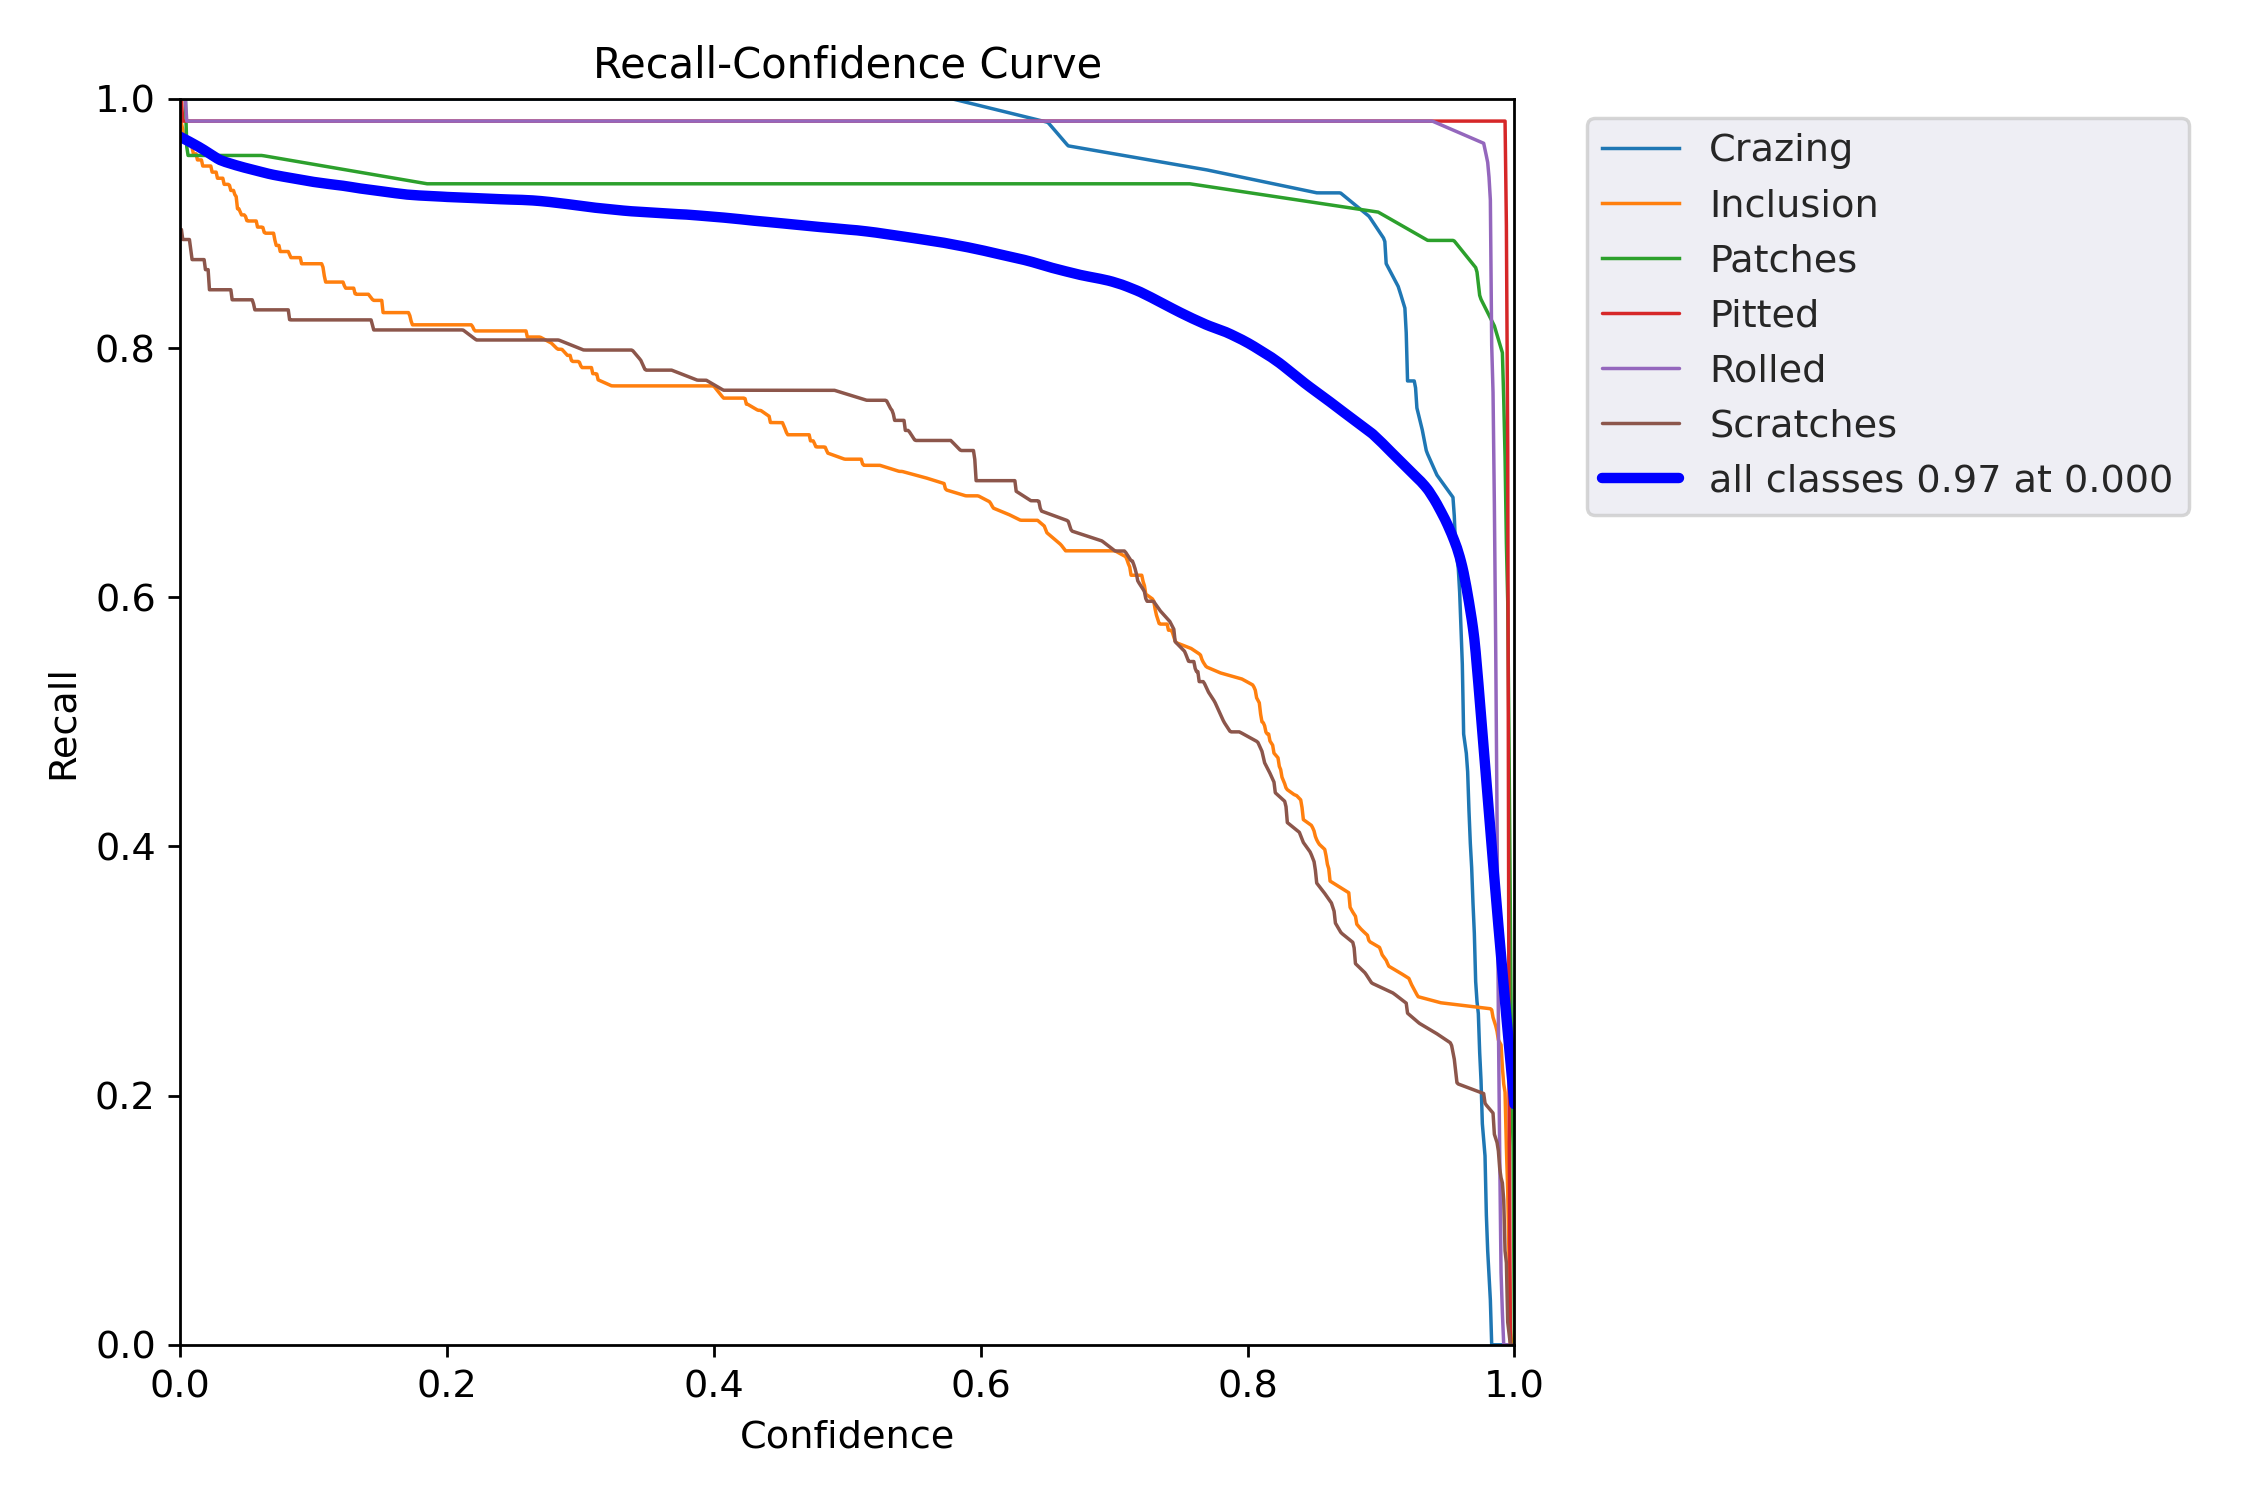

In [17]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/R_curve.png", width=1000)

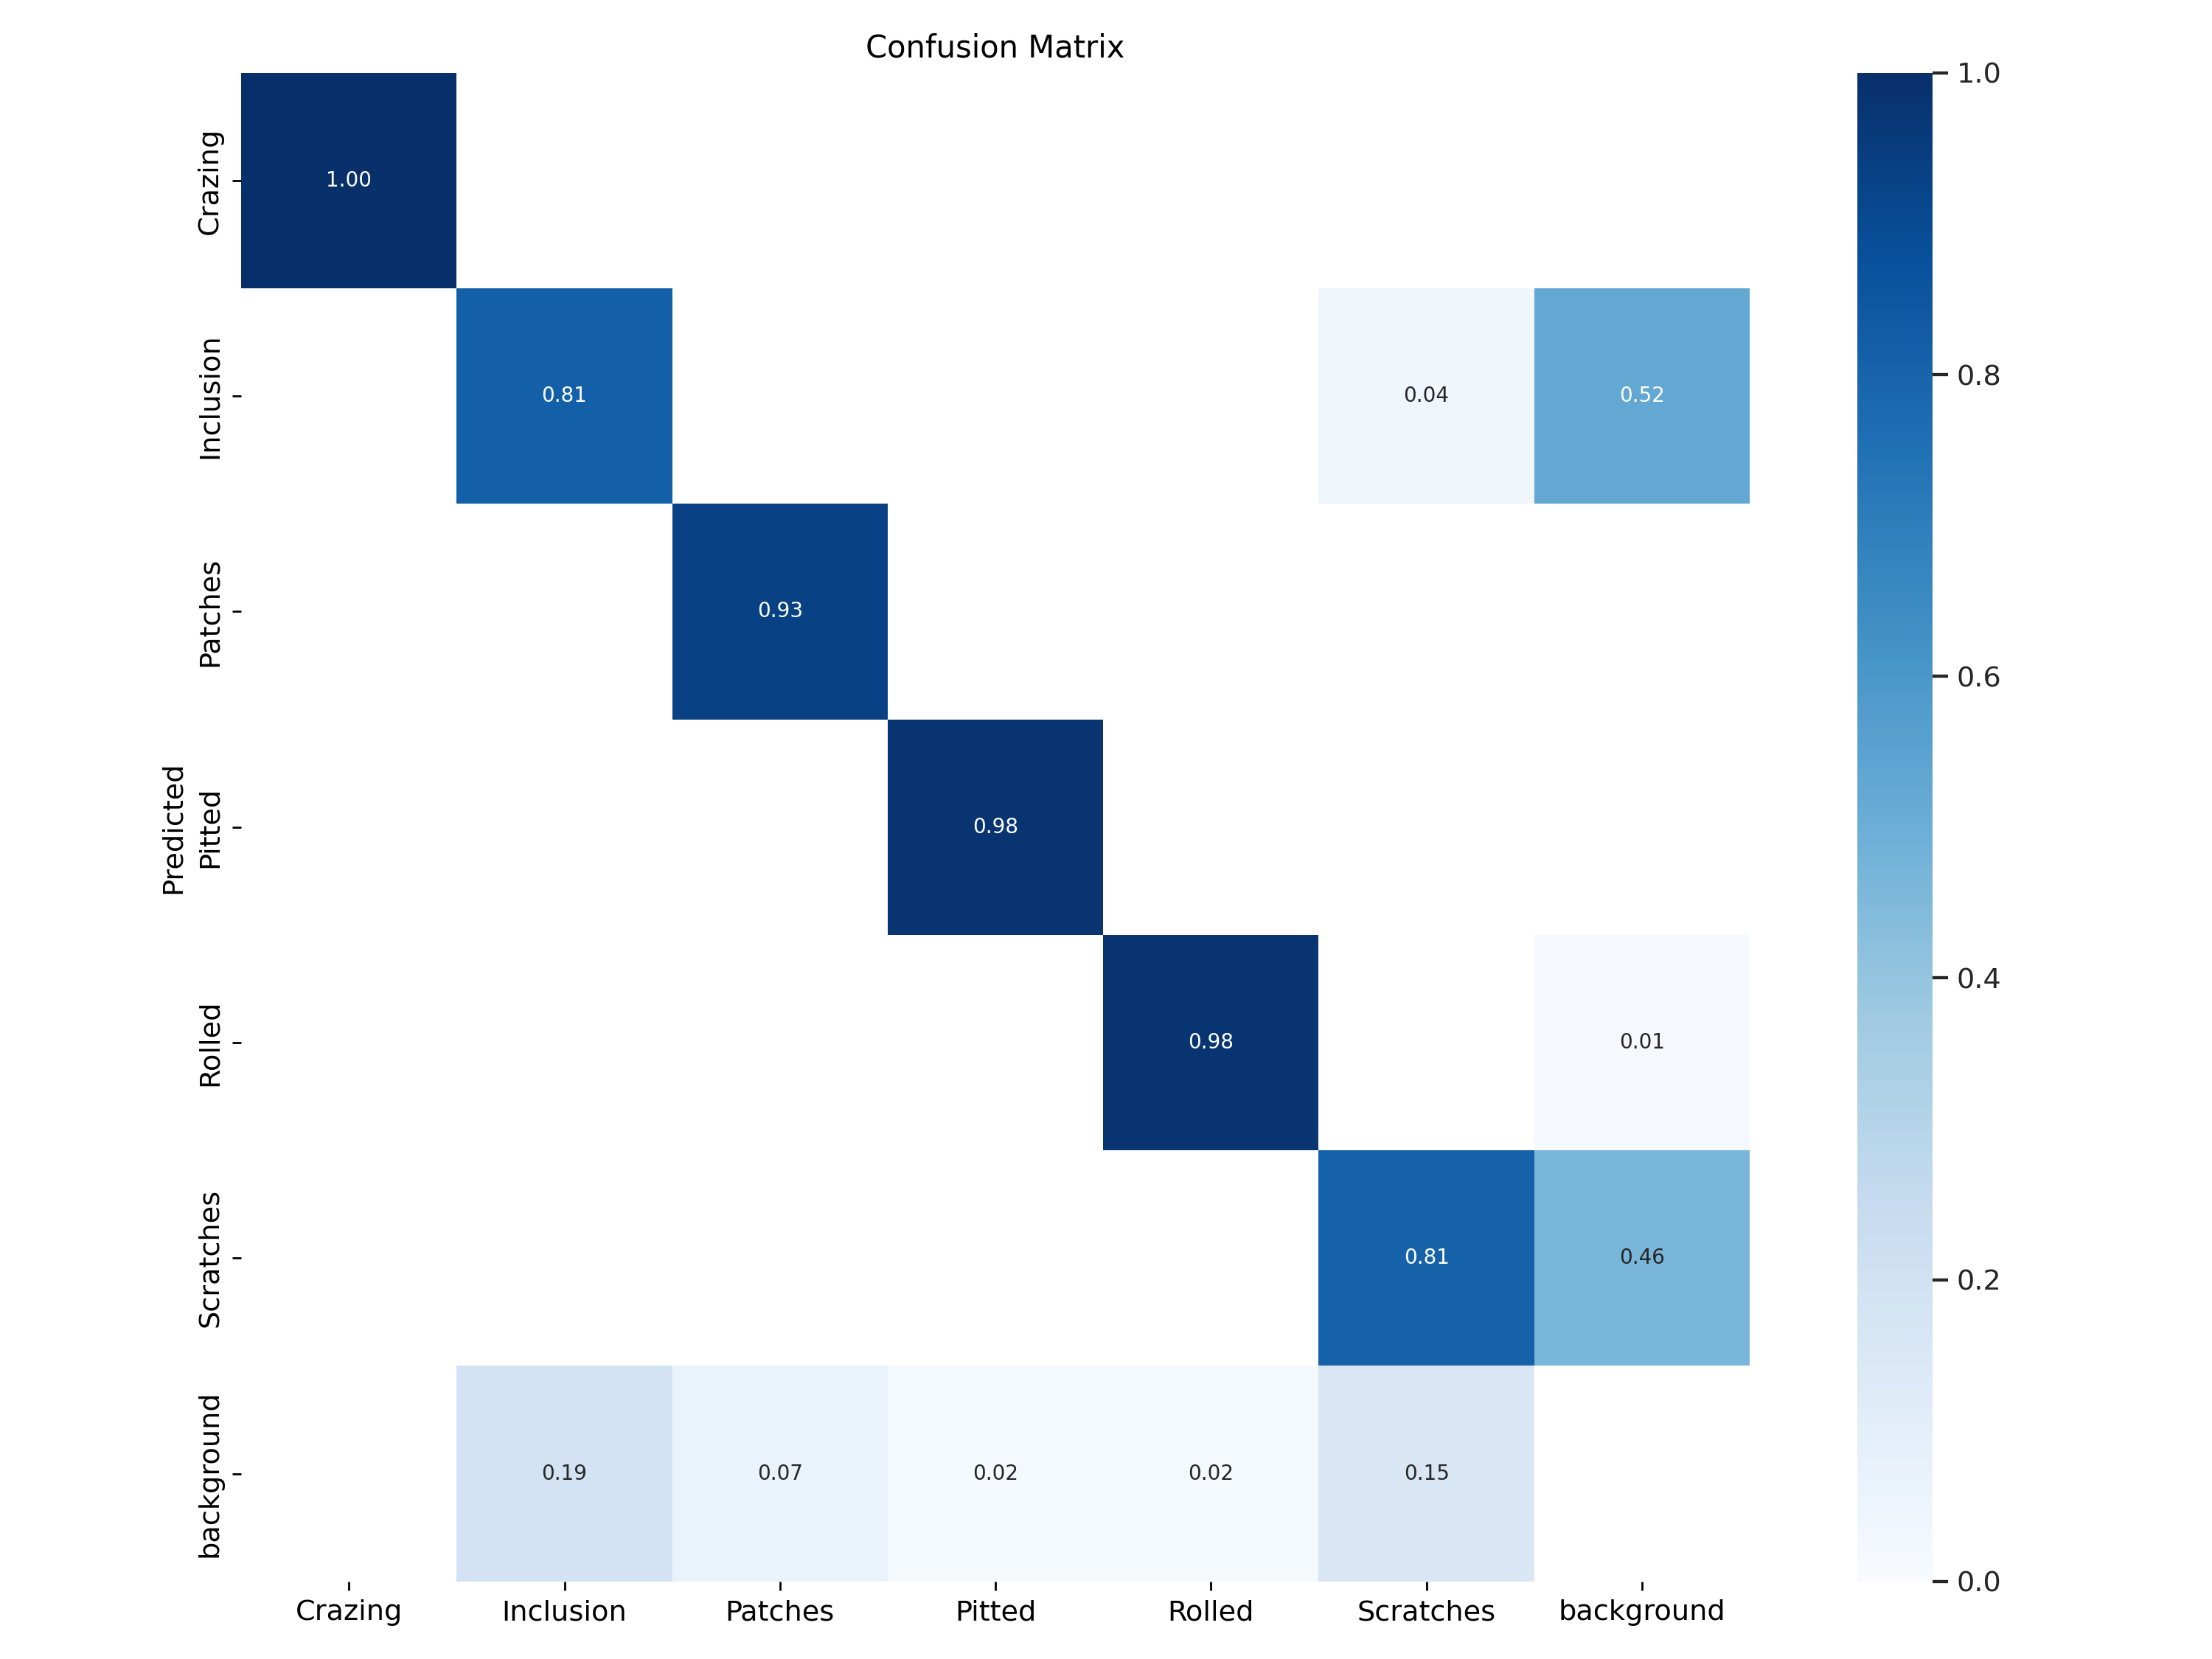

In [18]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

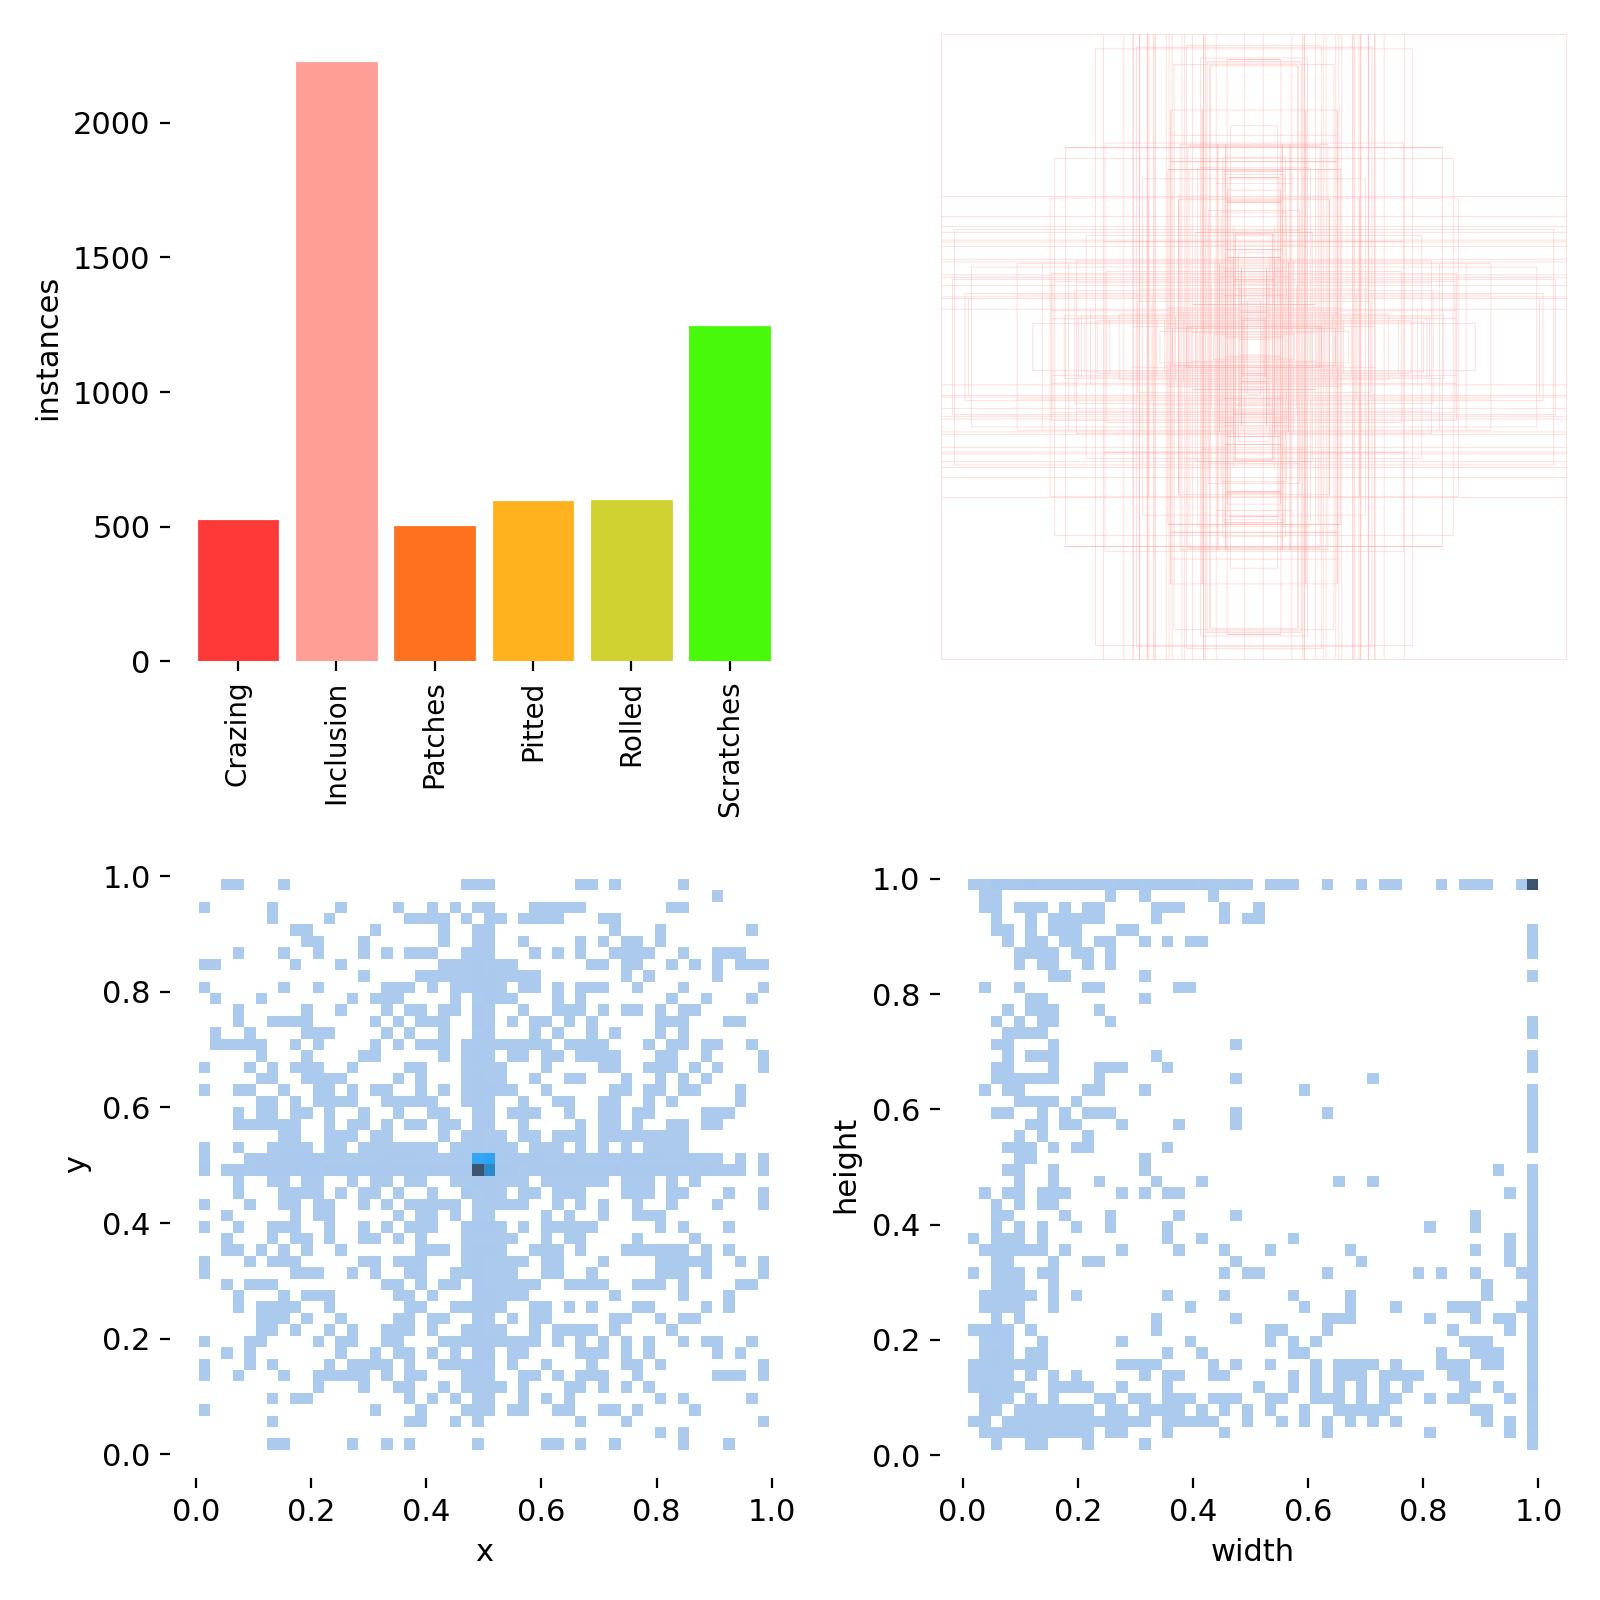

In [20]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/labels.jpg", width=1000)

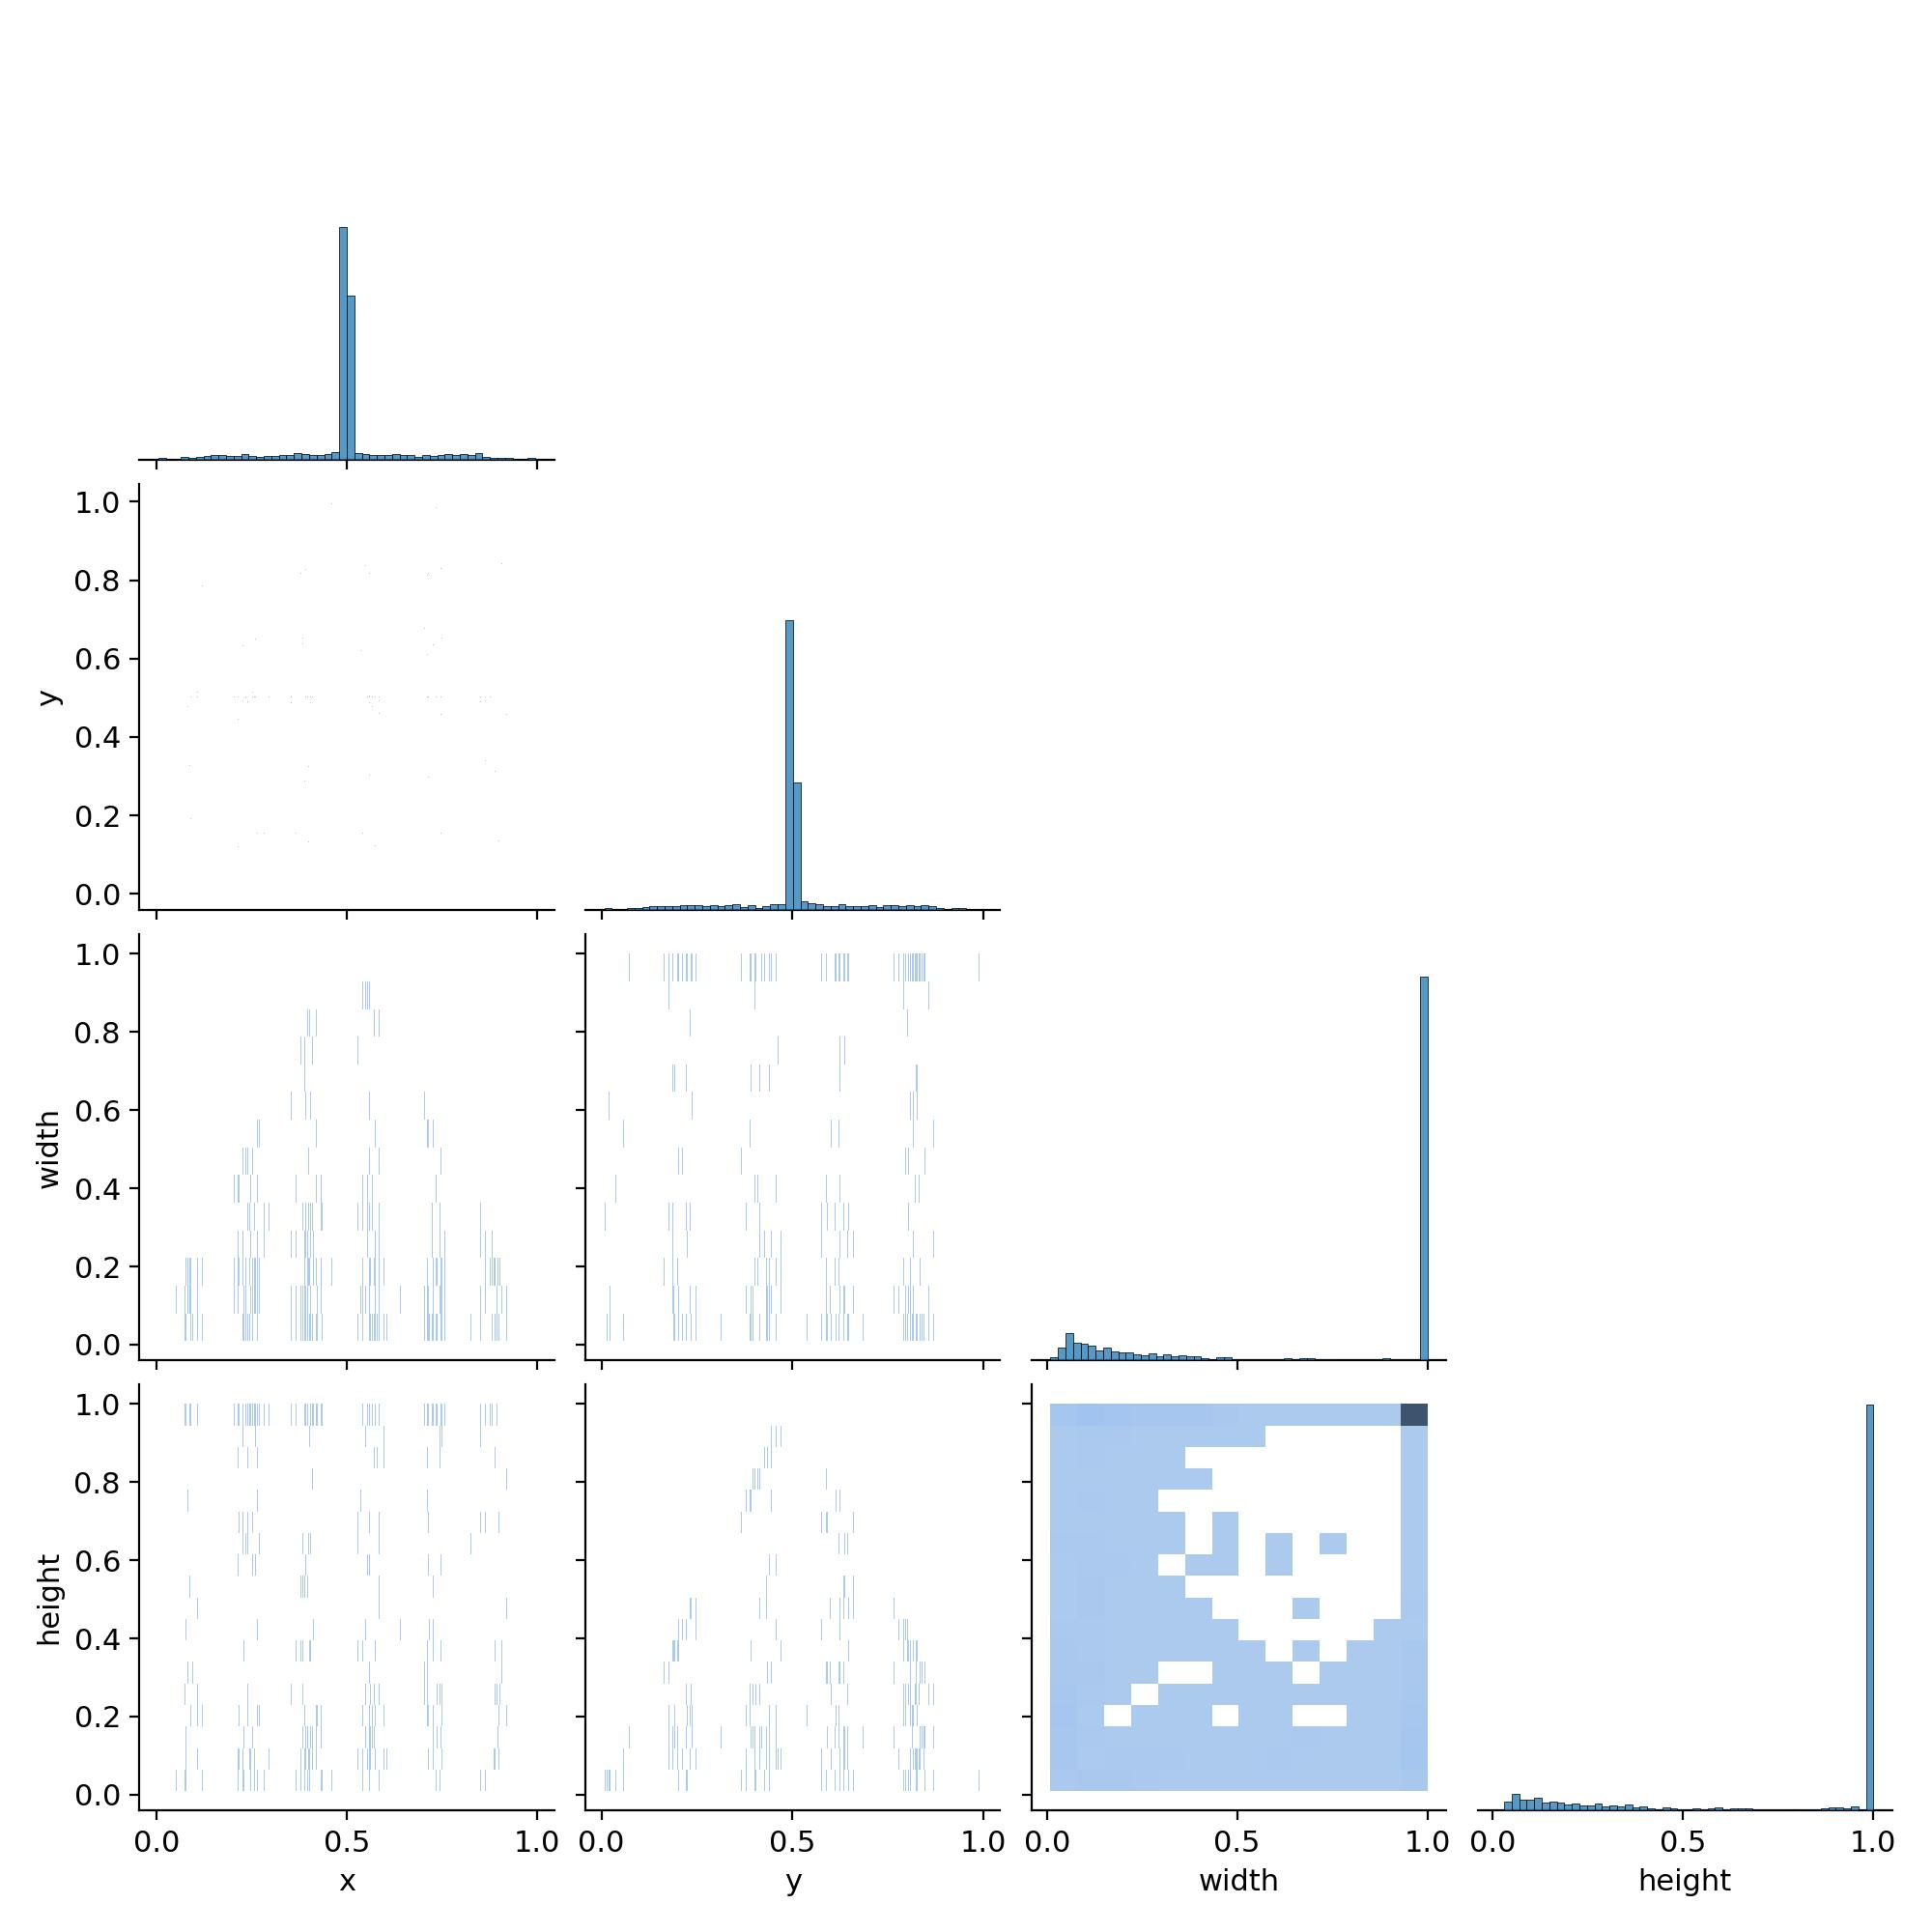

In [21]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/labels_correlogram.jpg", width=1000)

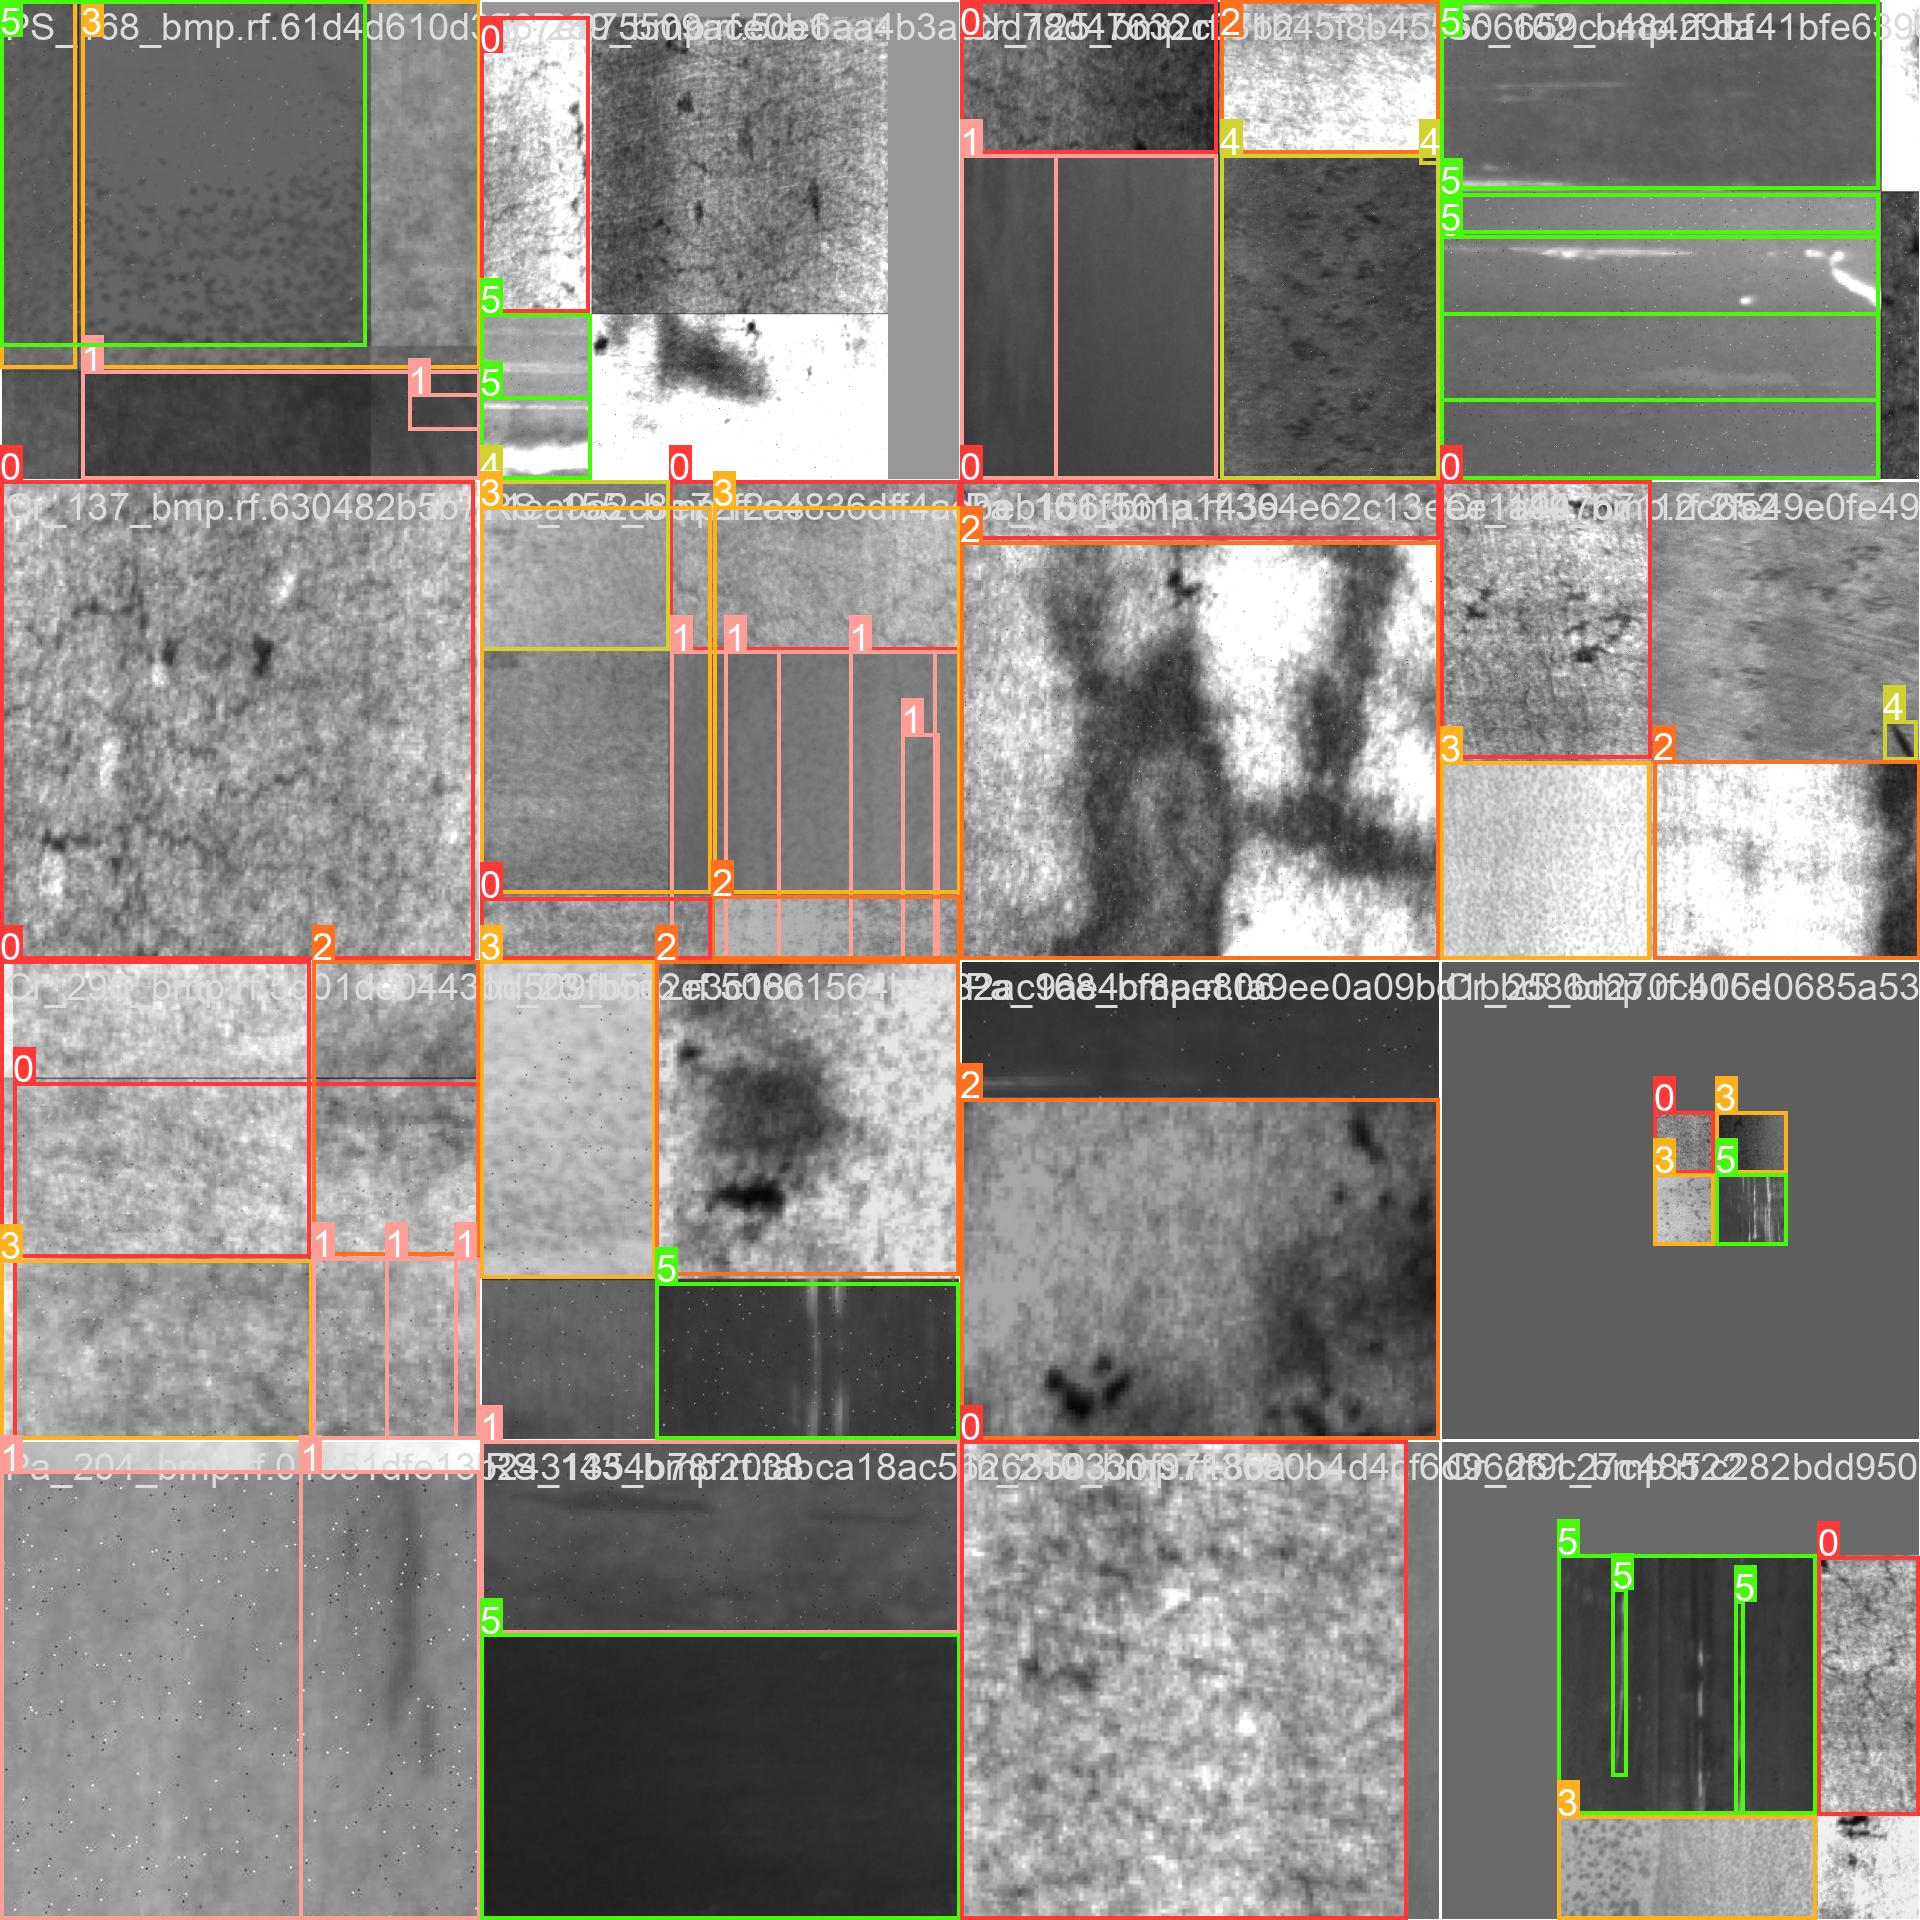

In [22]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/train_batch0.jpg", width=1000)

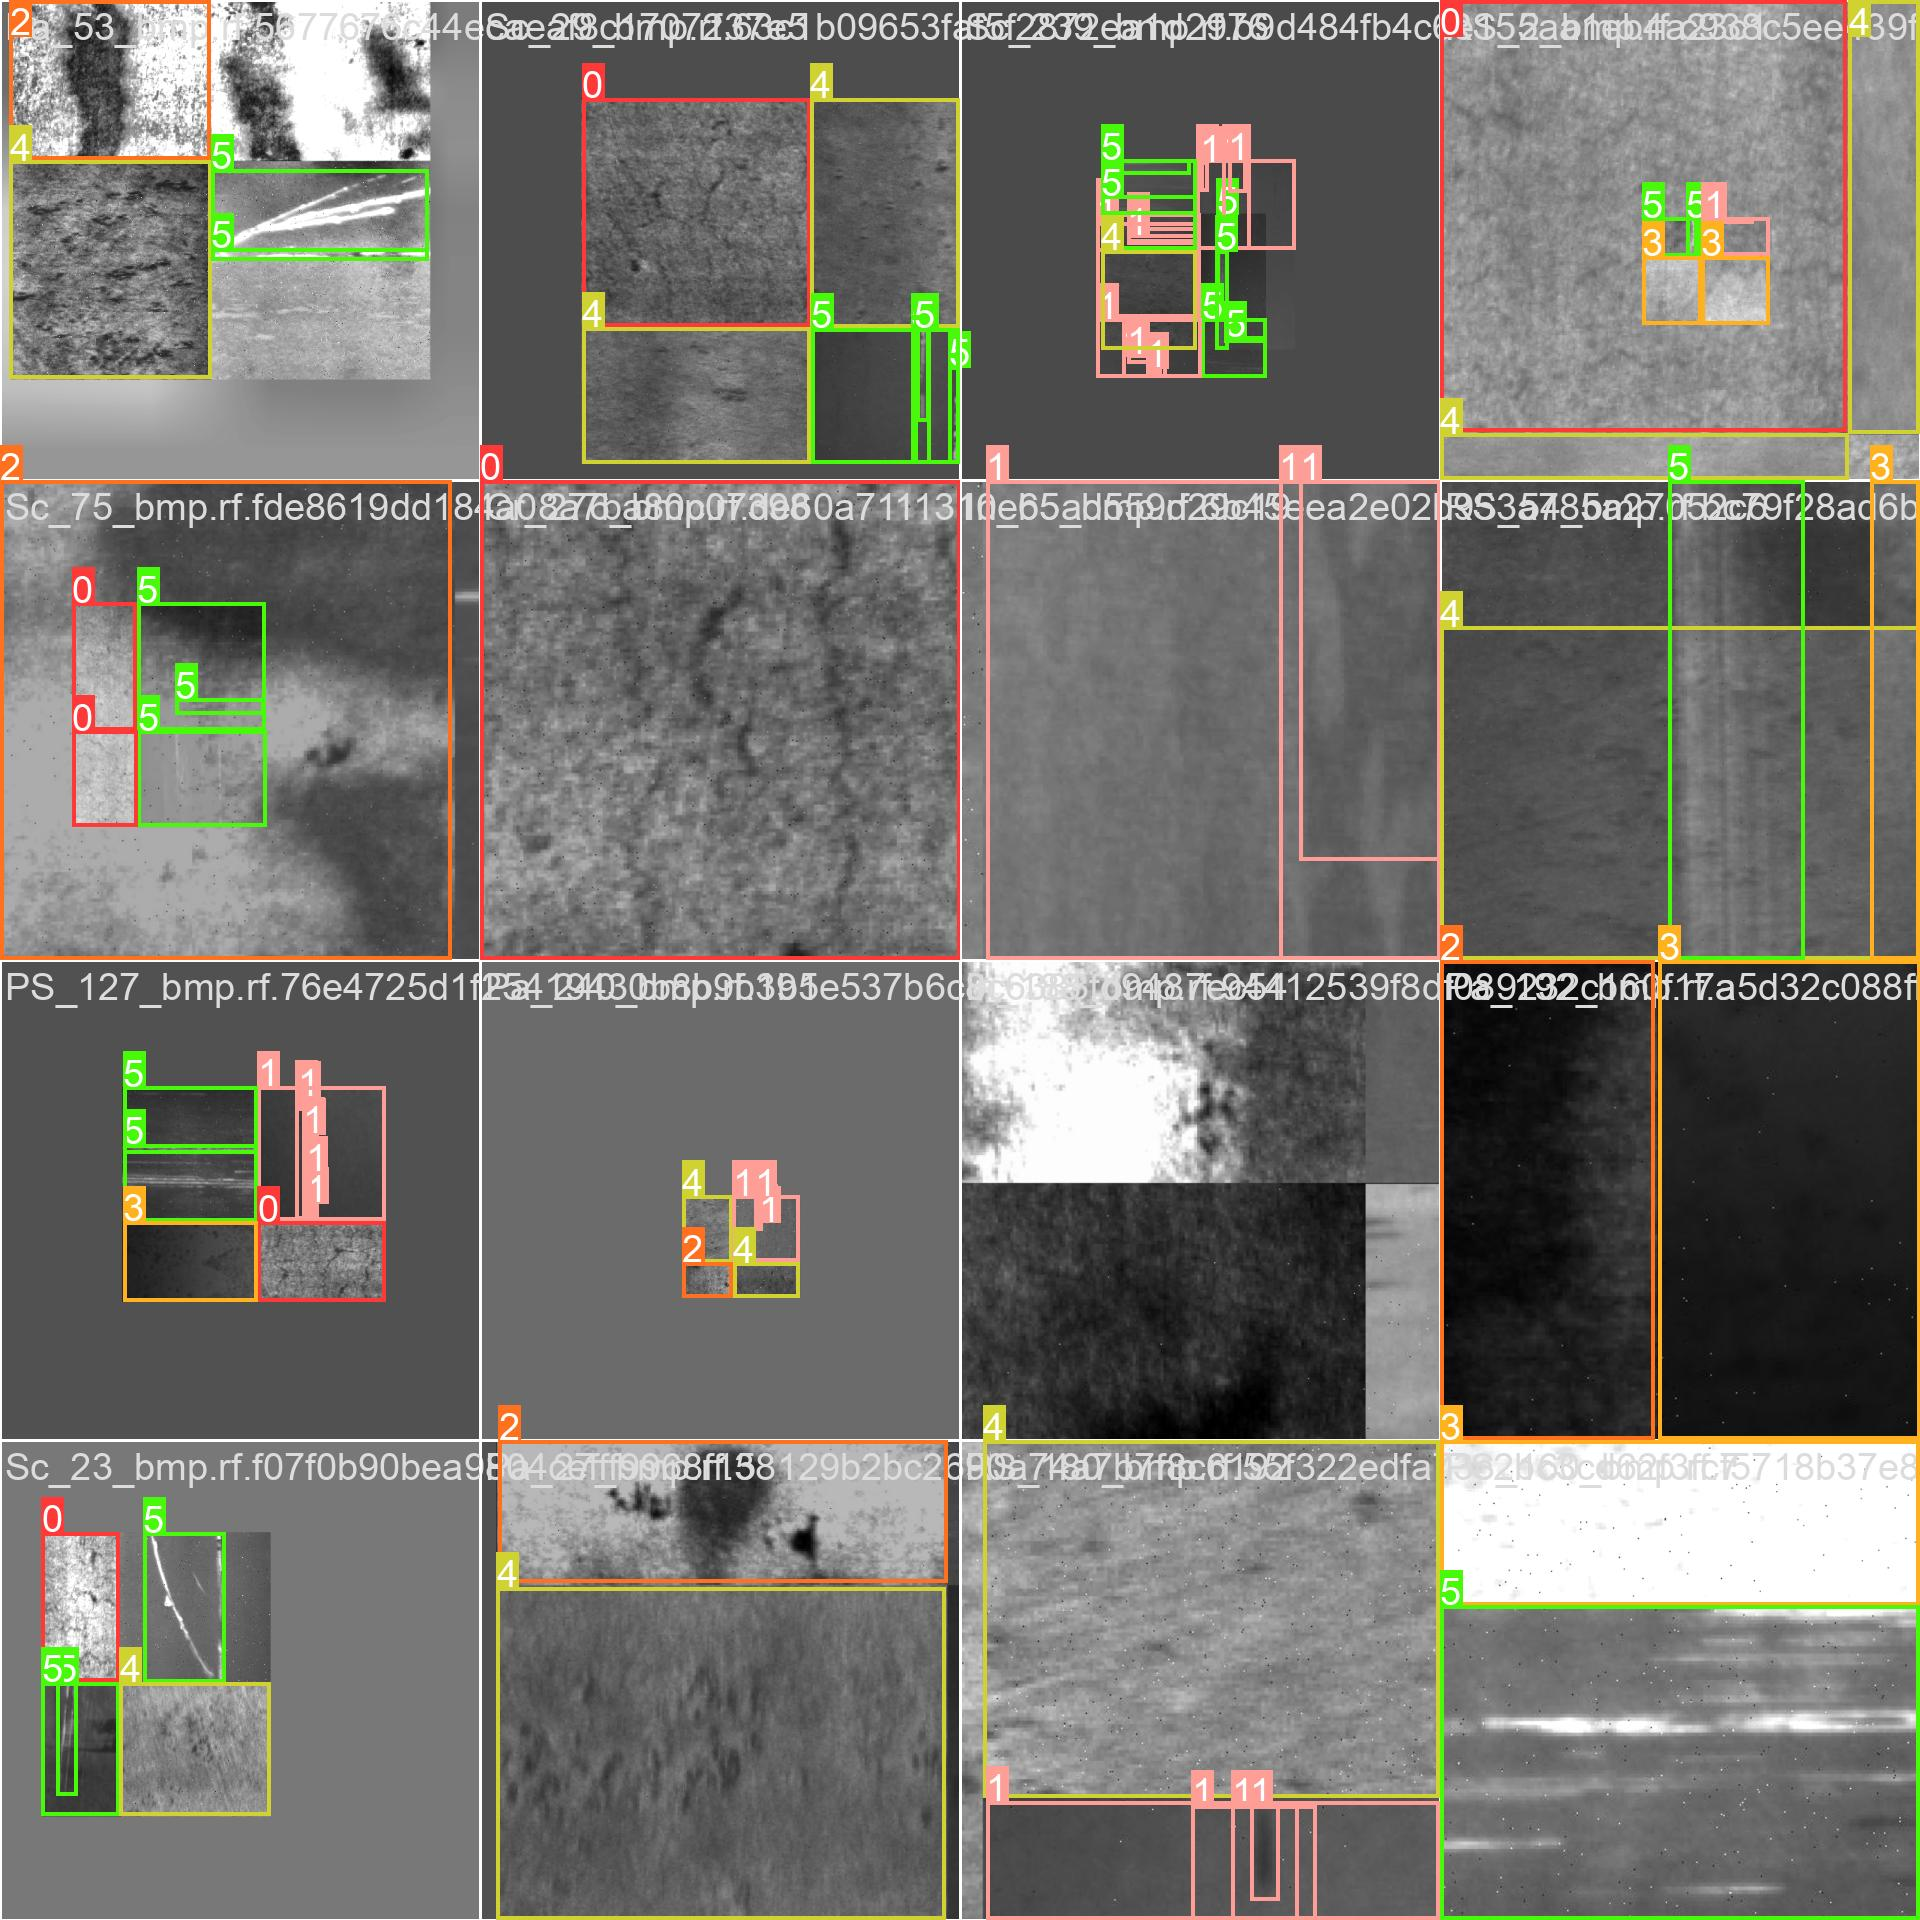

In [23]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/train_batch1.jpg", width=1000)

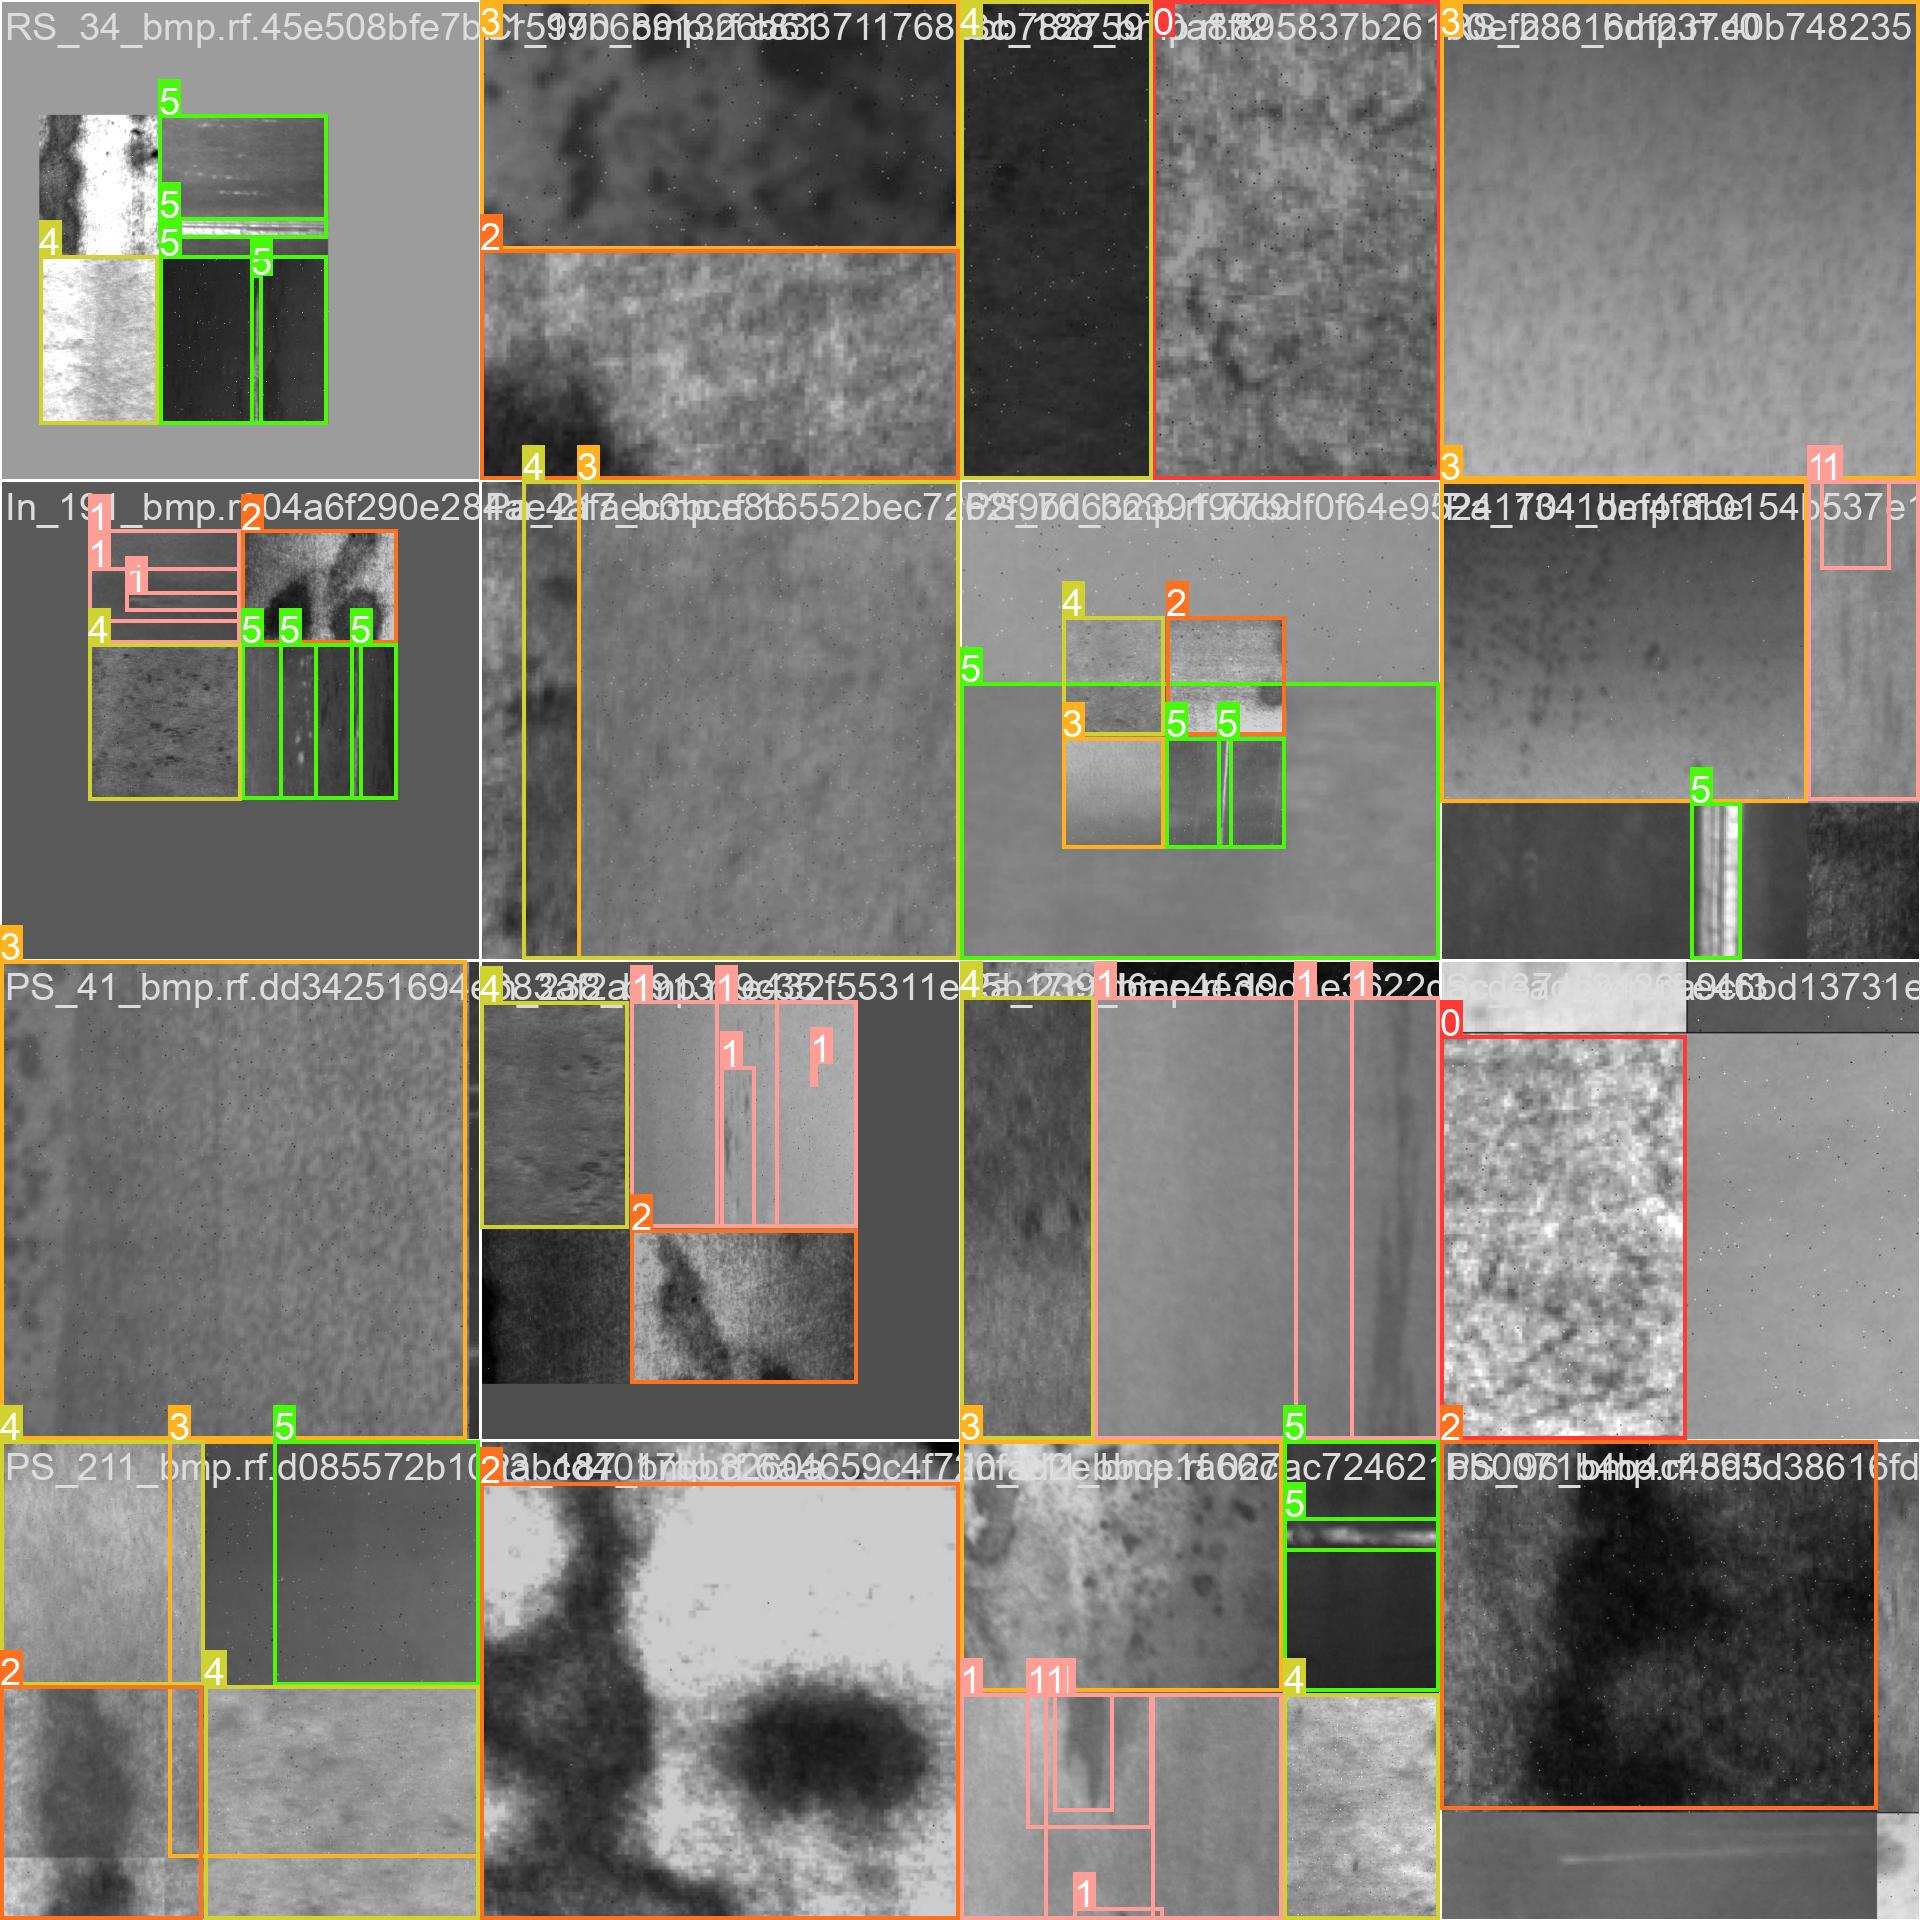

In [24]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/train_batch2.jpg", width=1000)

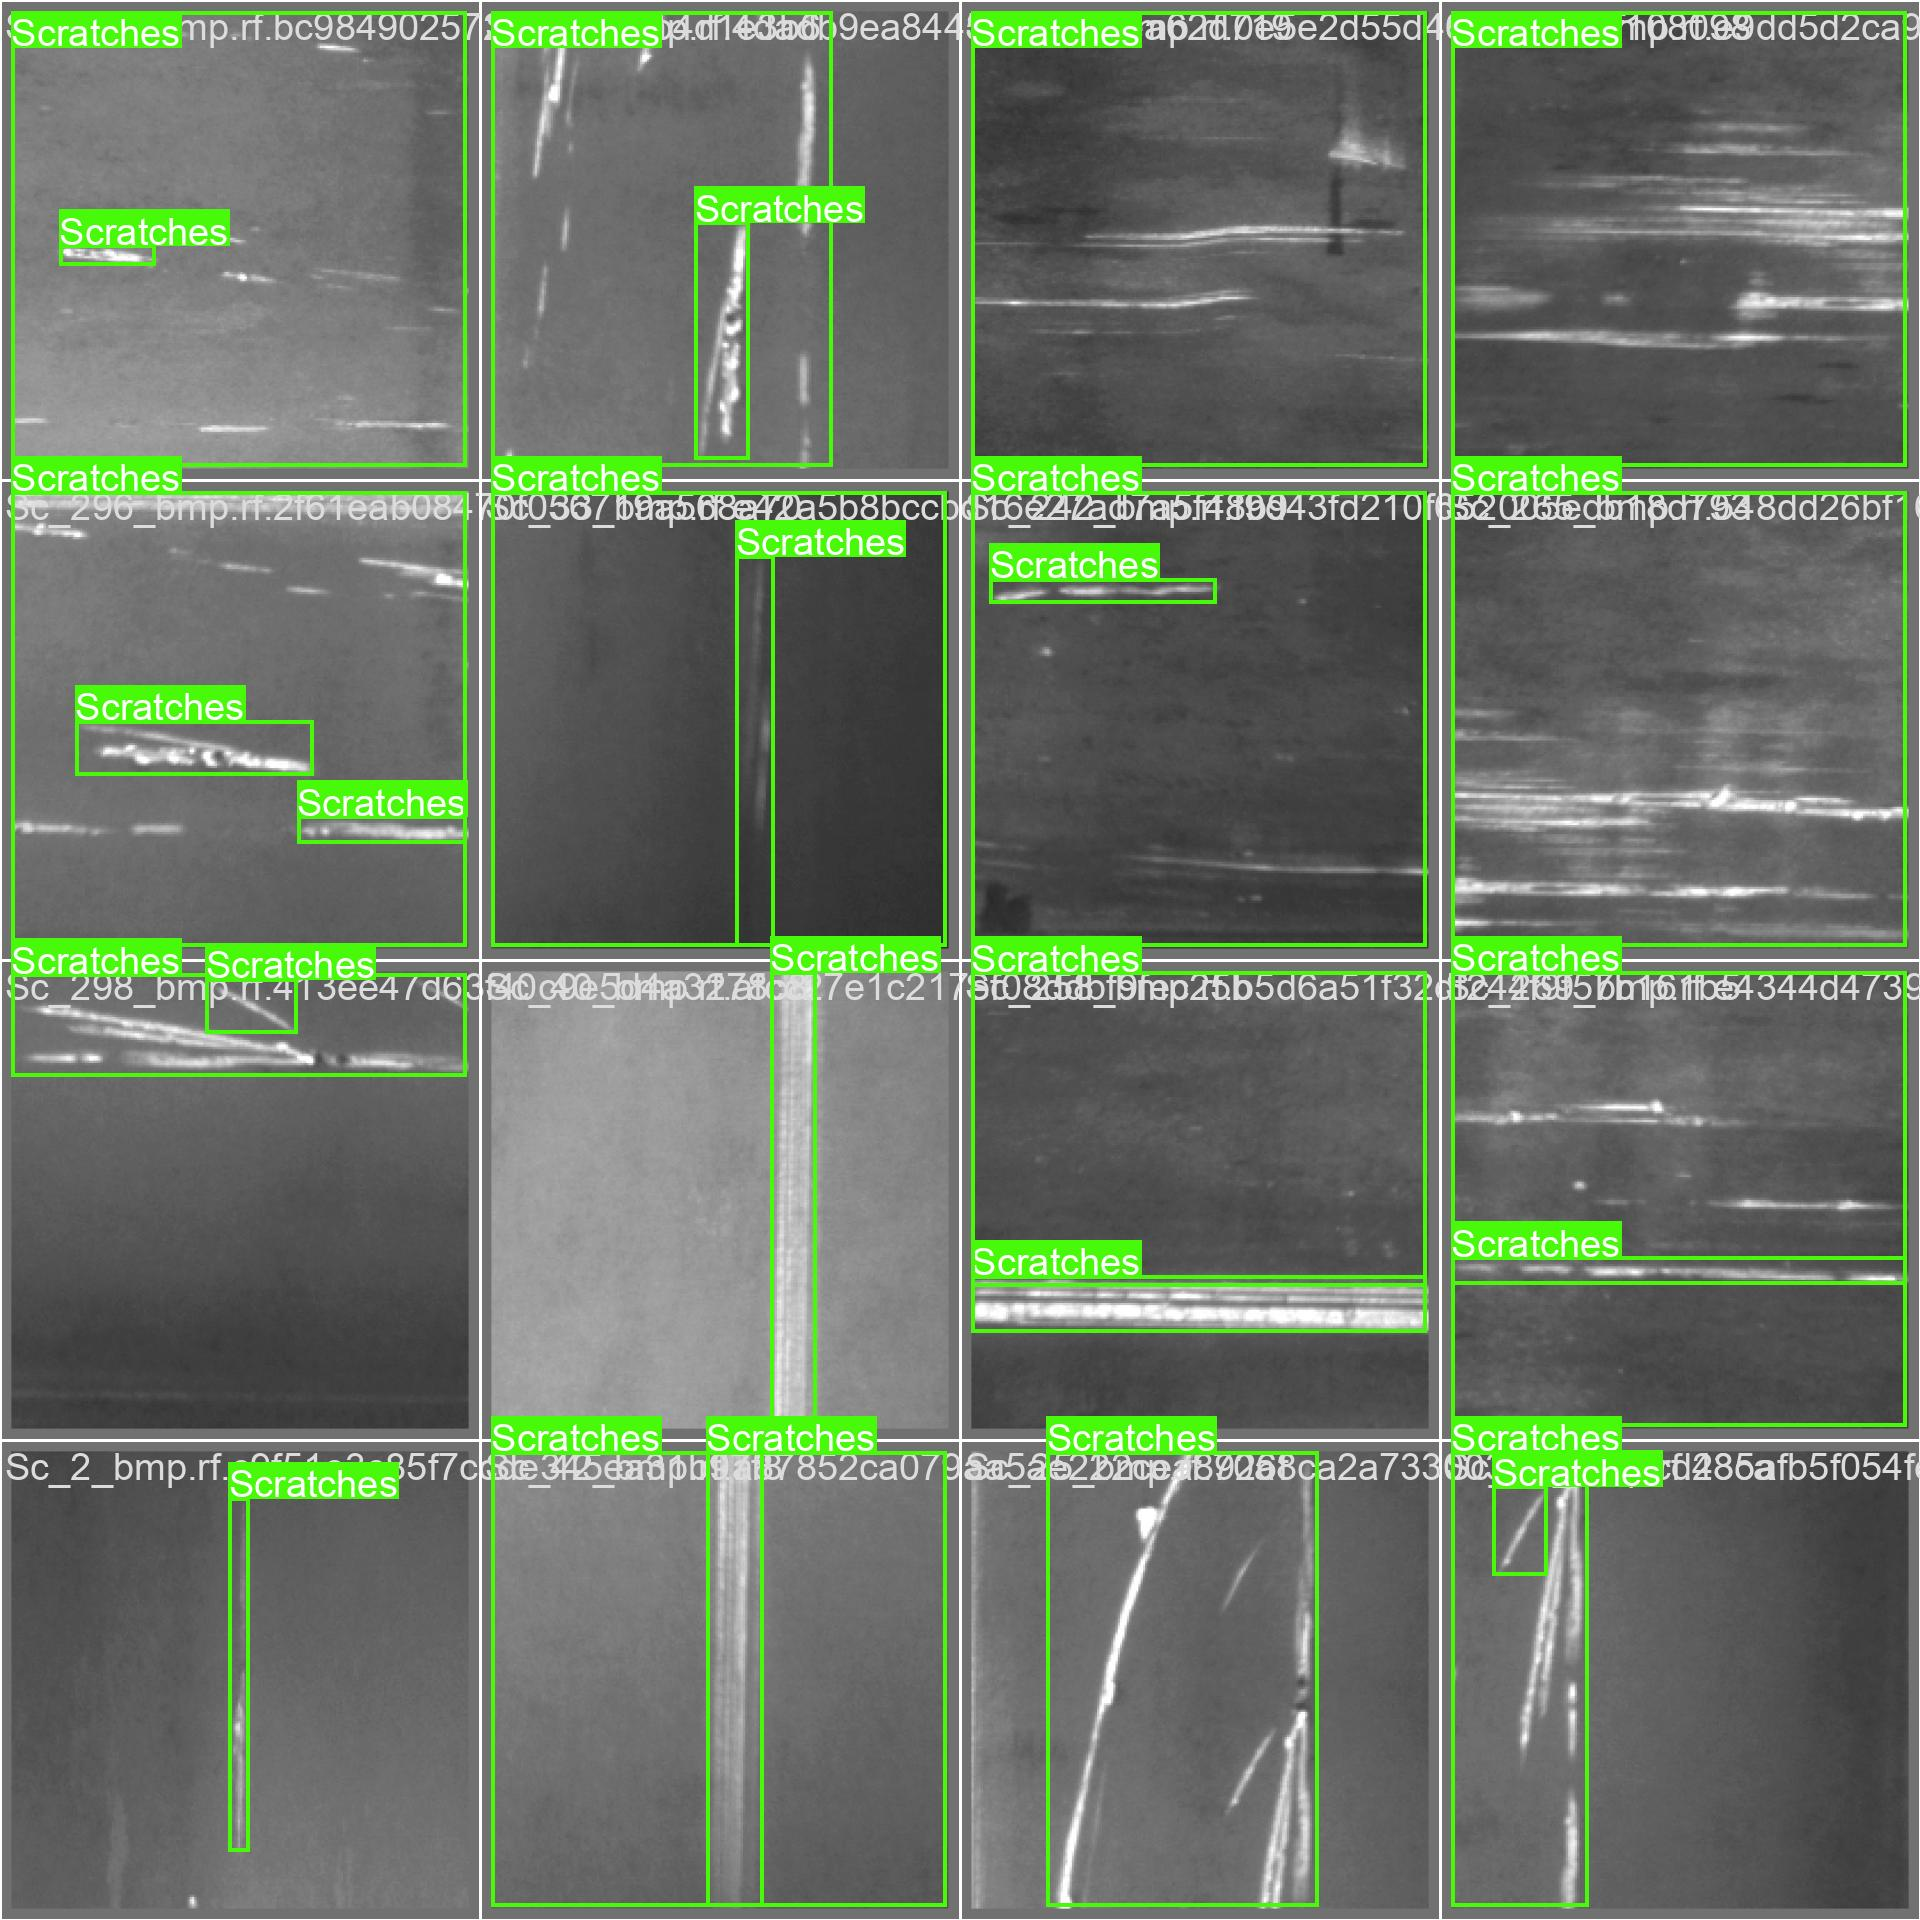

In [25]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_labels.jpg", width=1000)

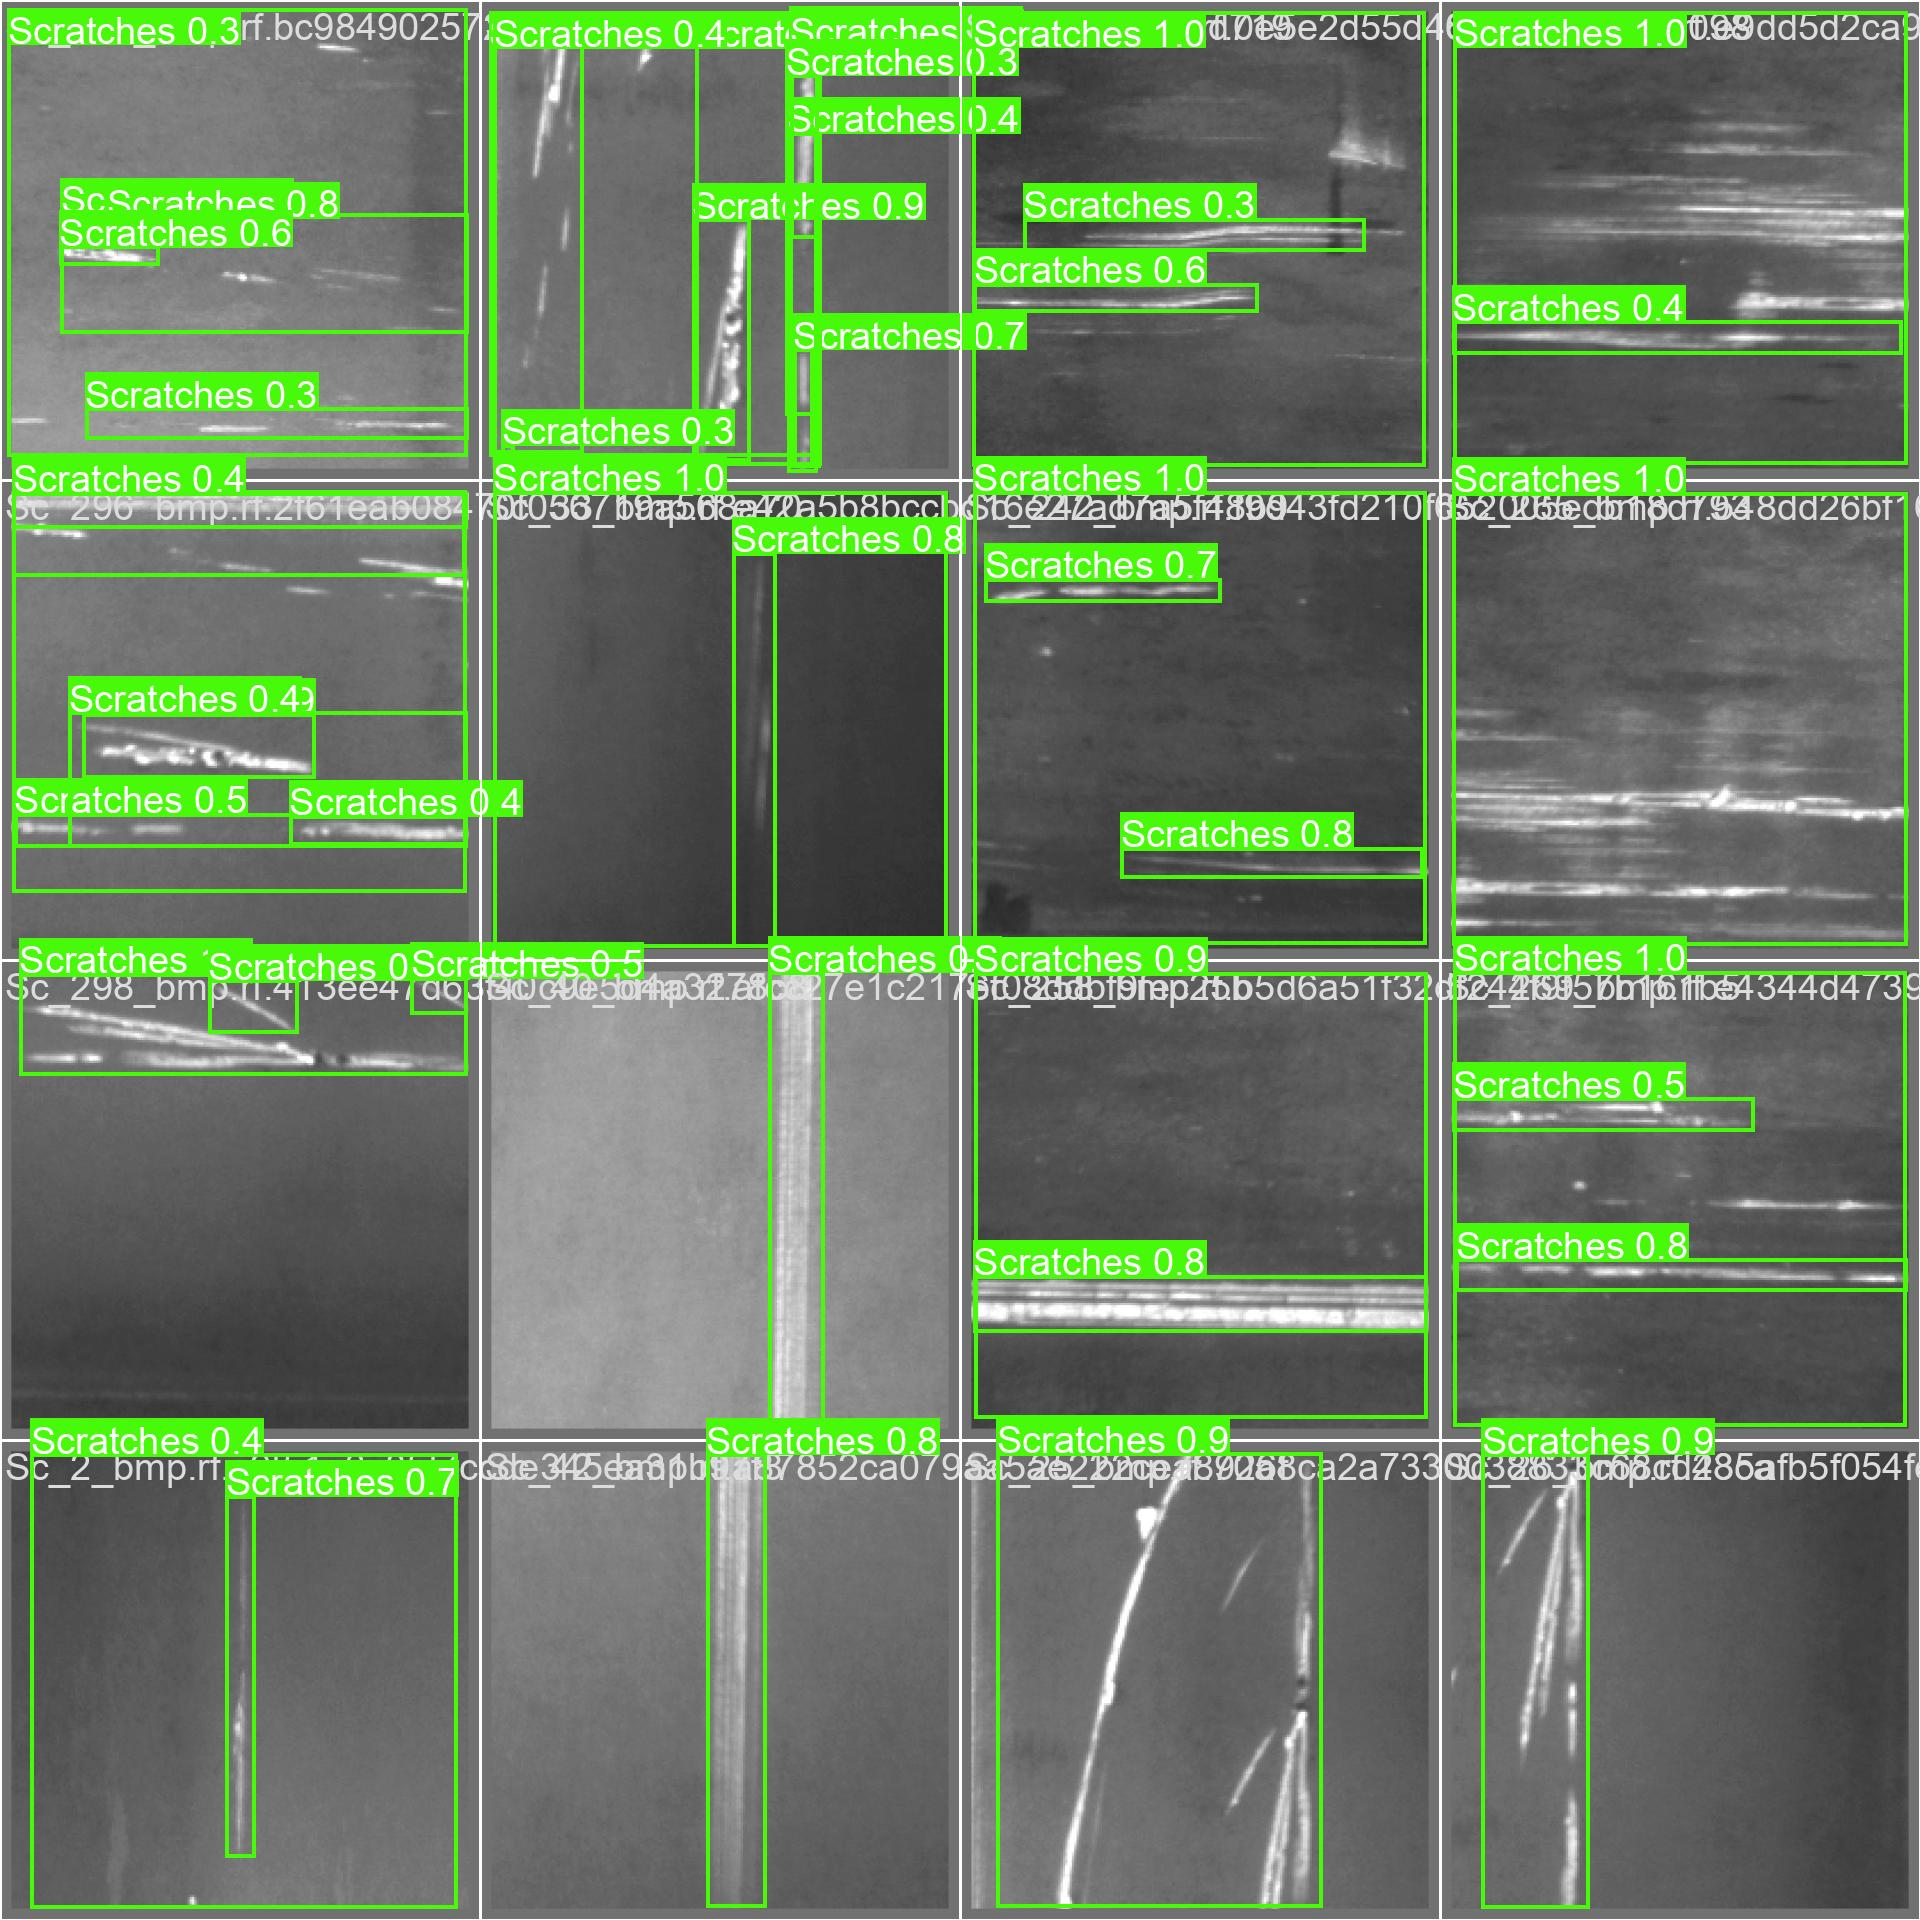

In [26]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

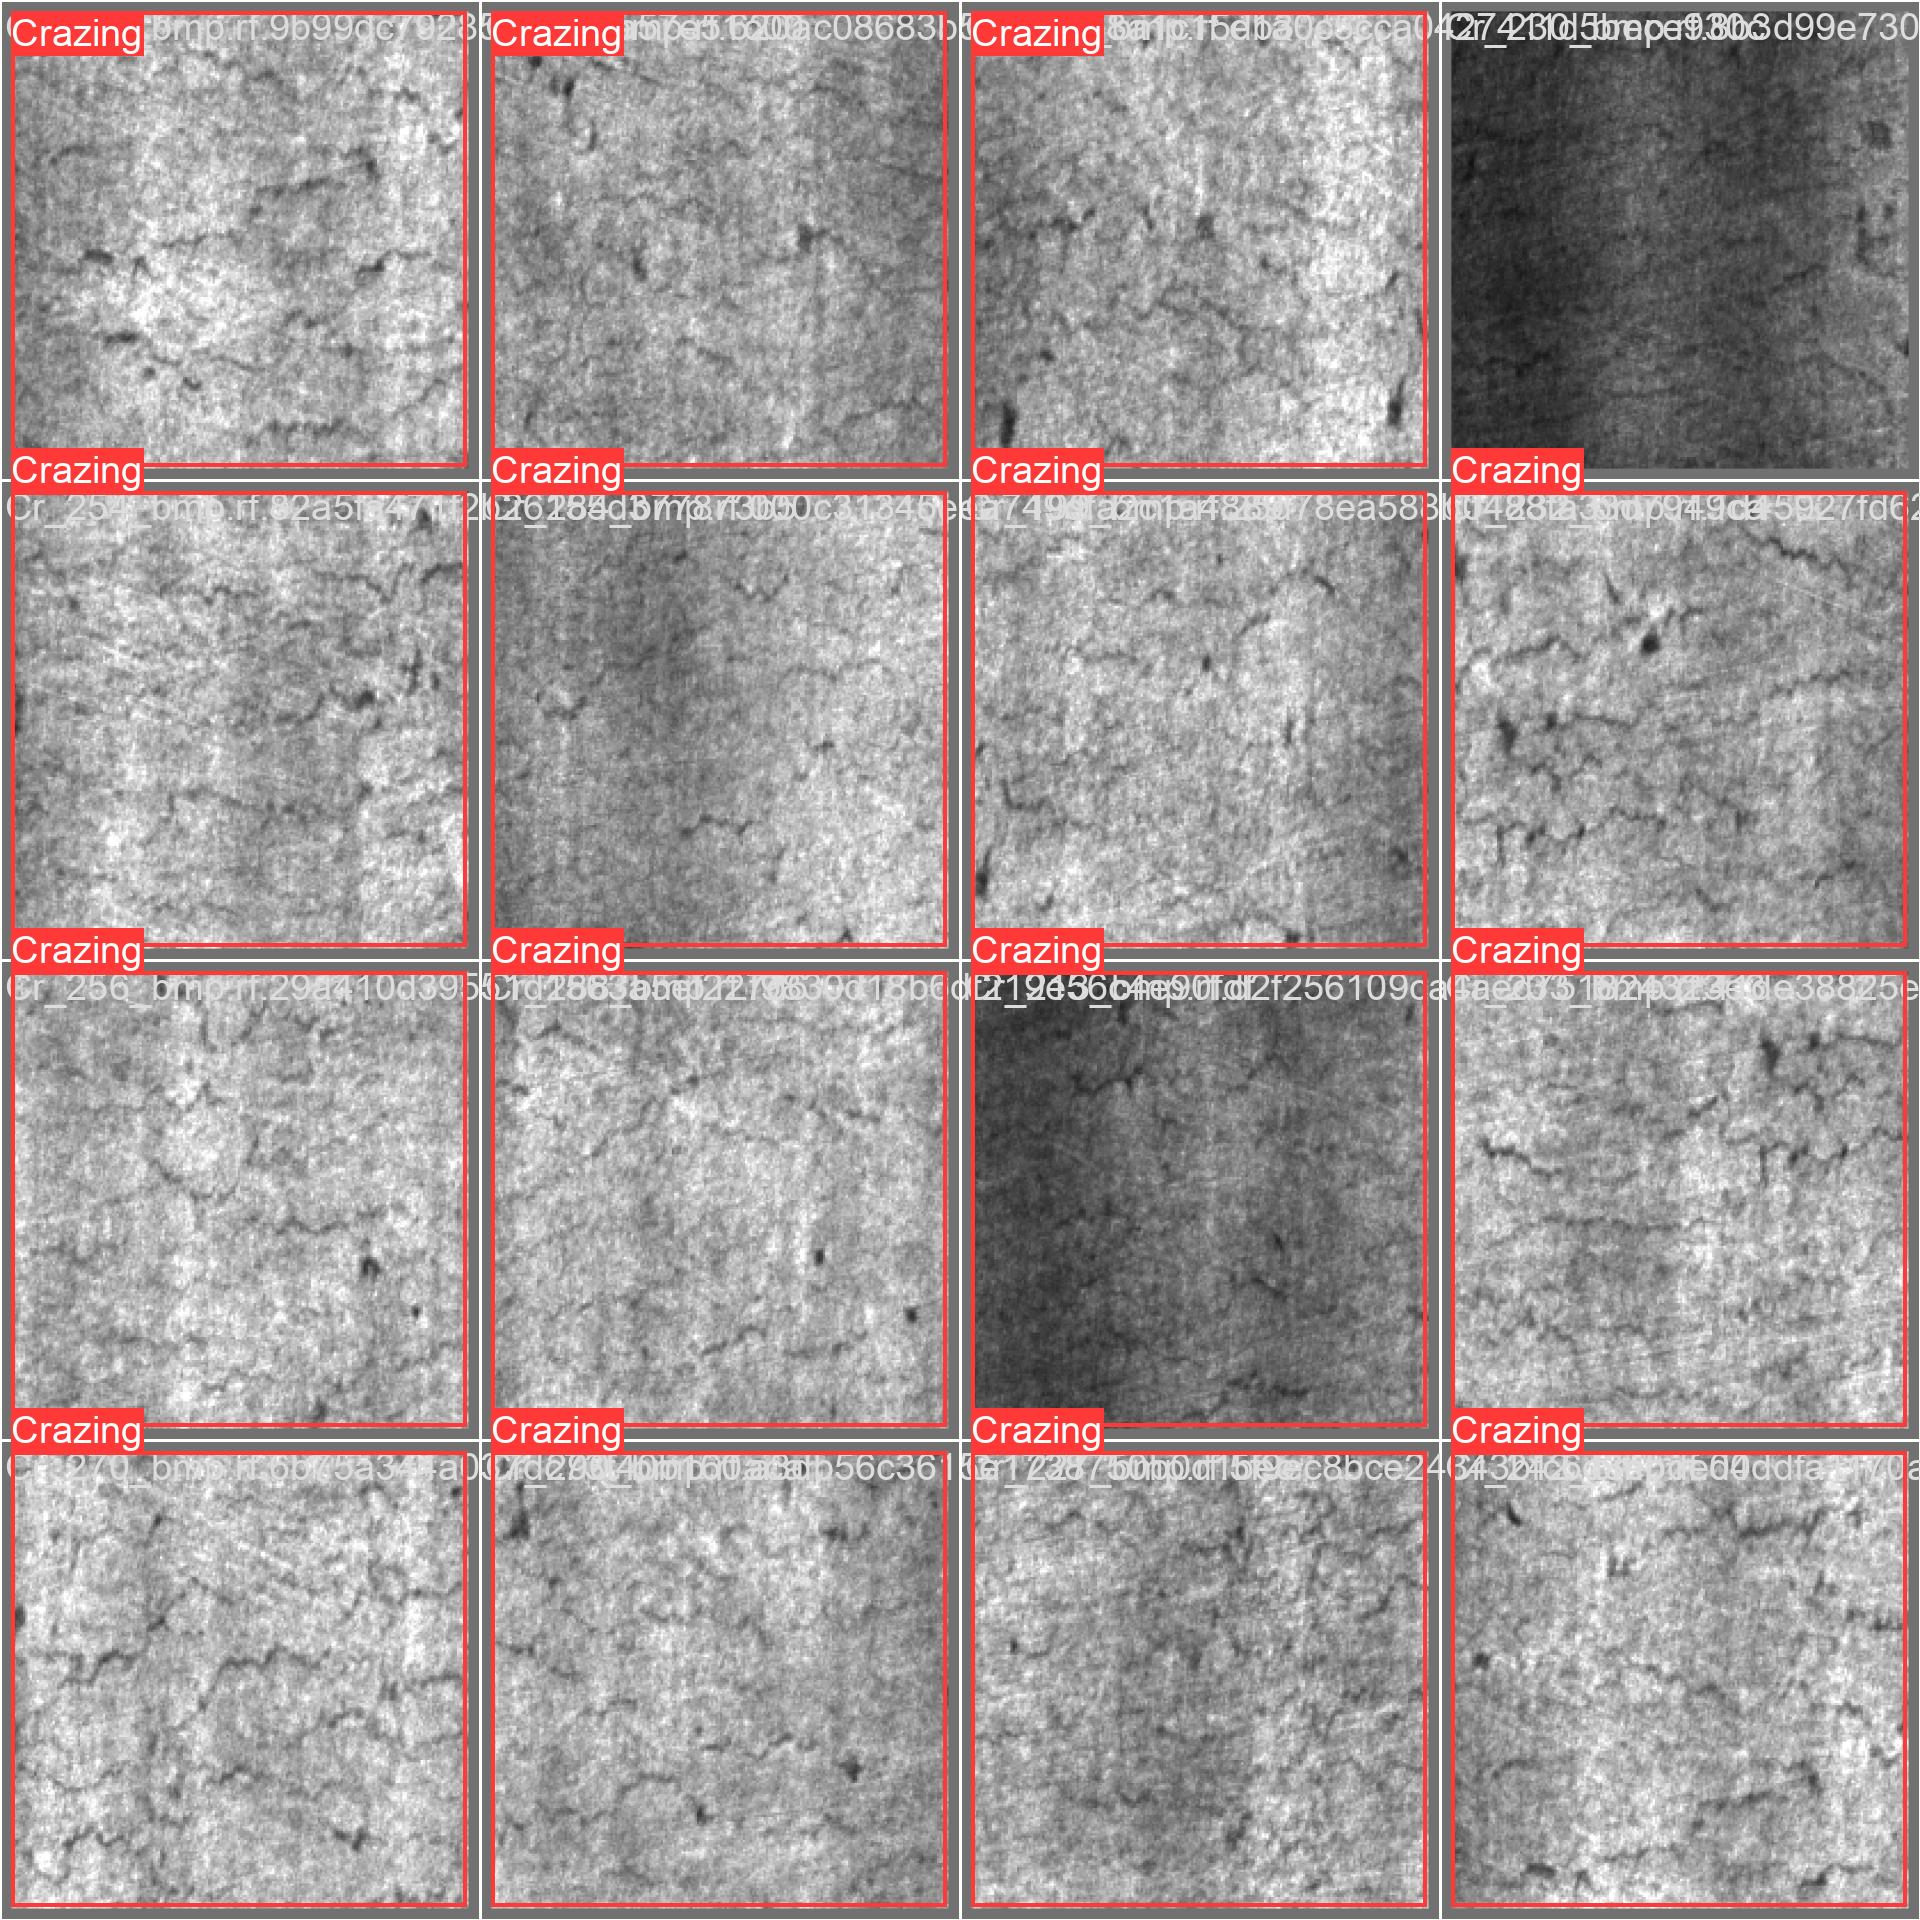

In [28]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch1_labels.jpg", width=1000)

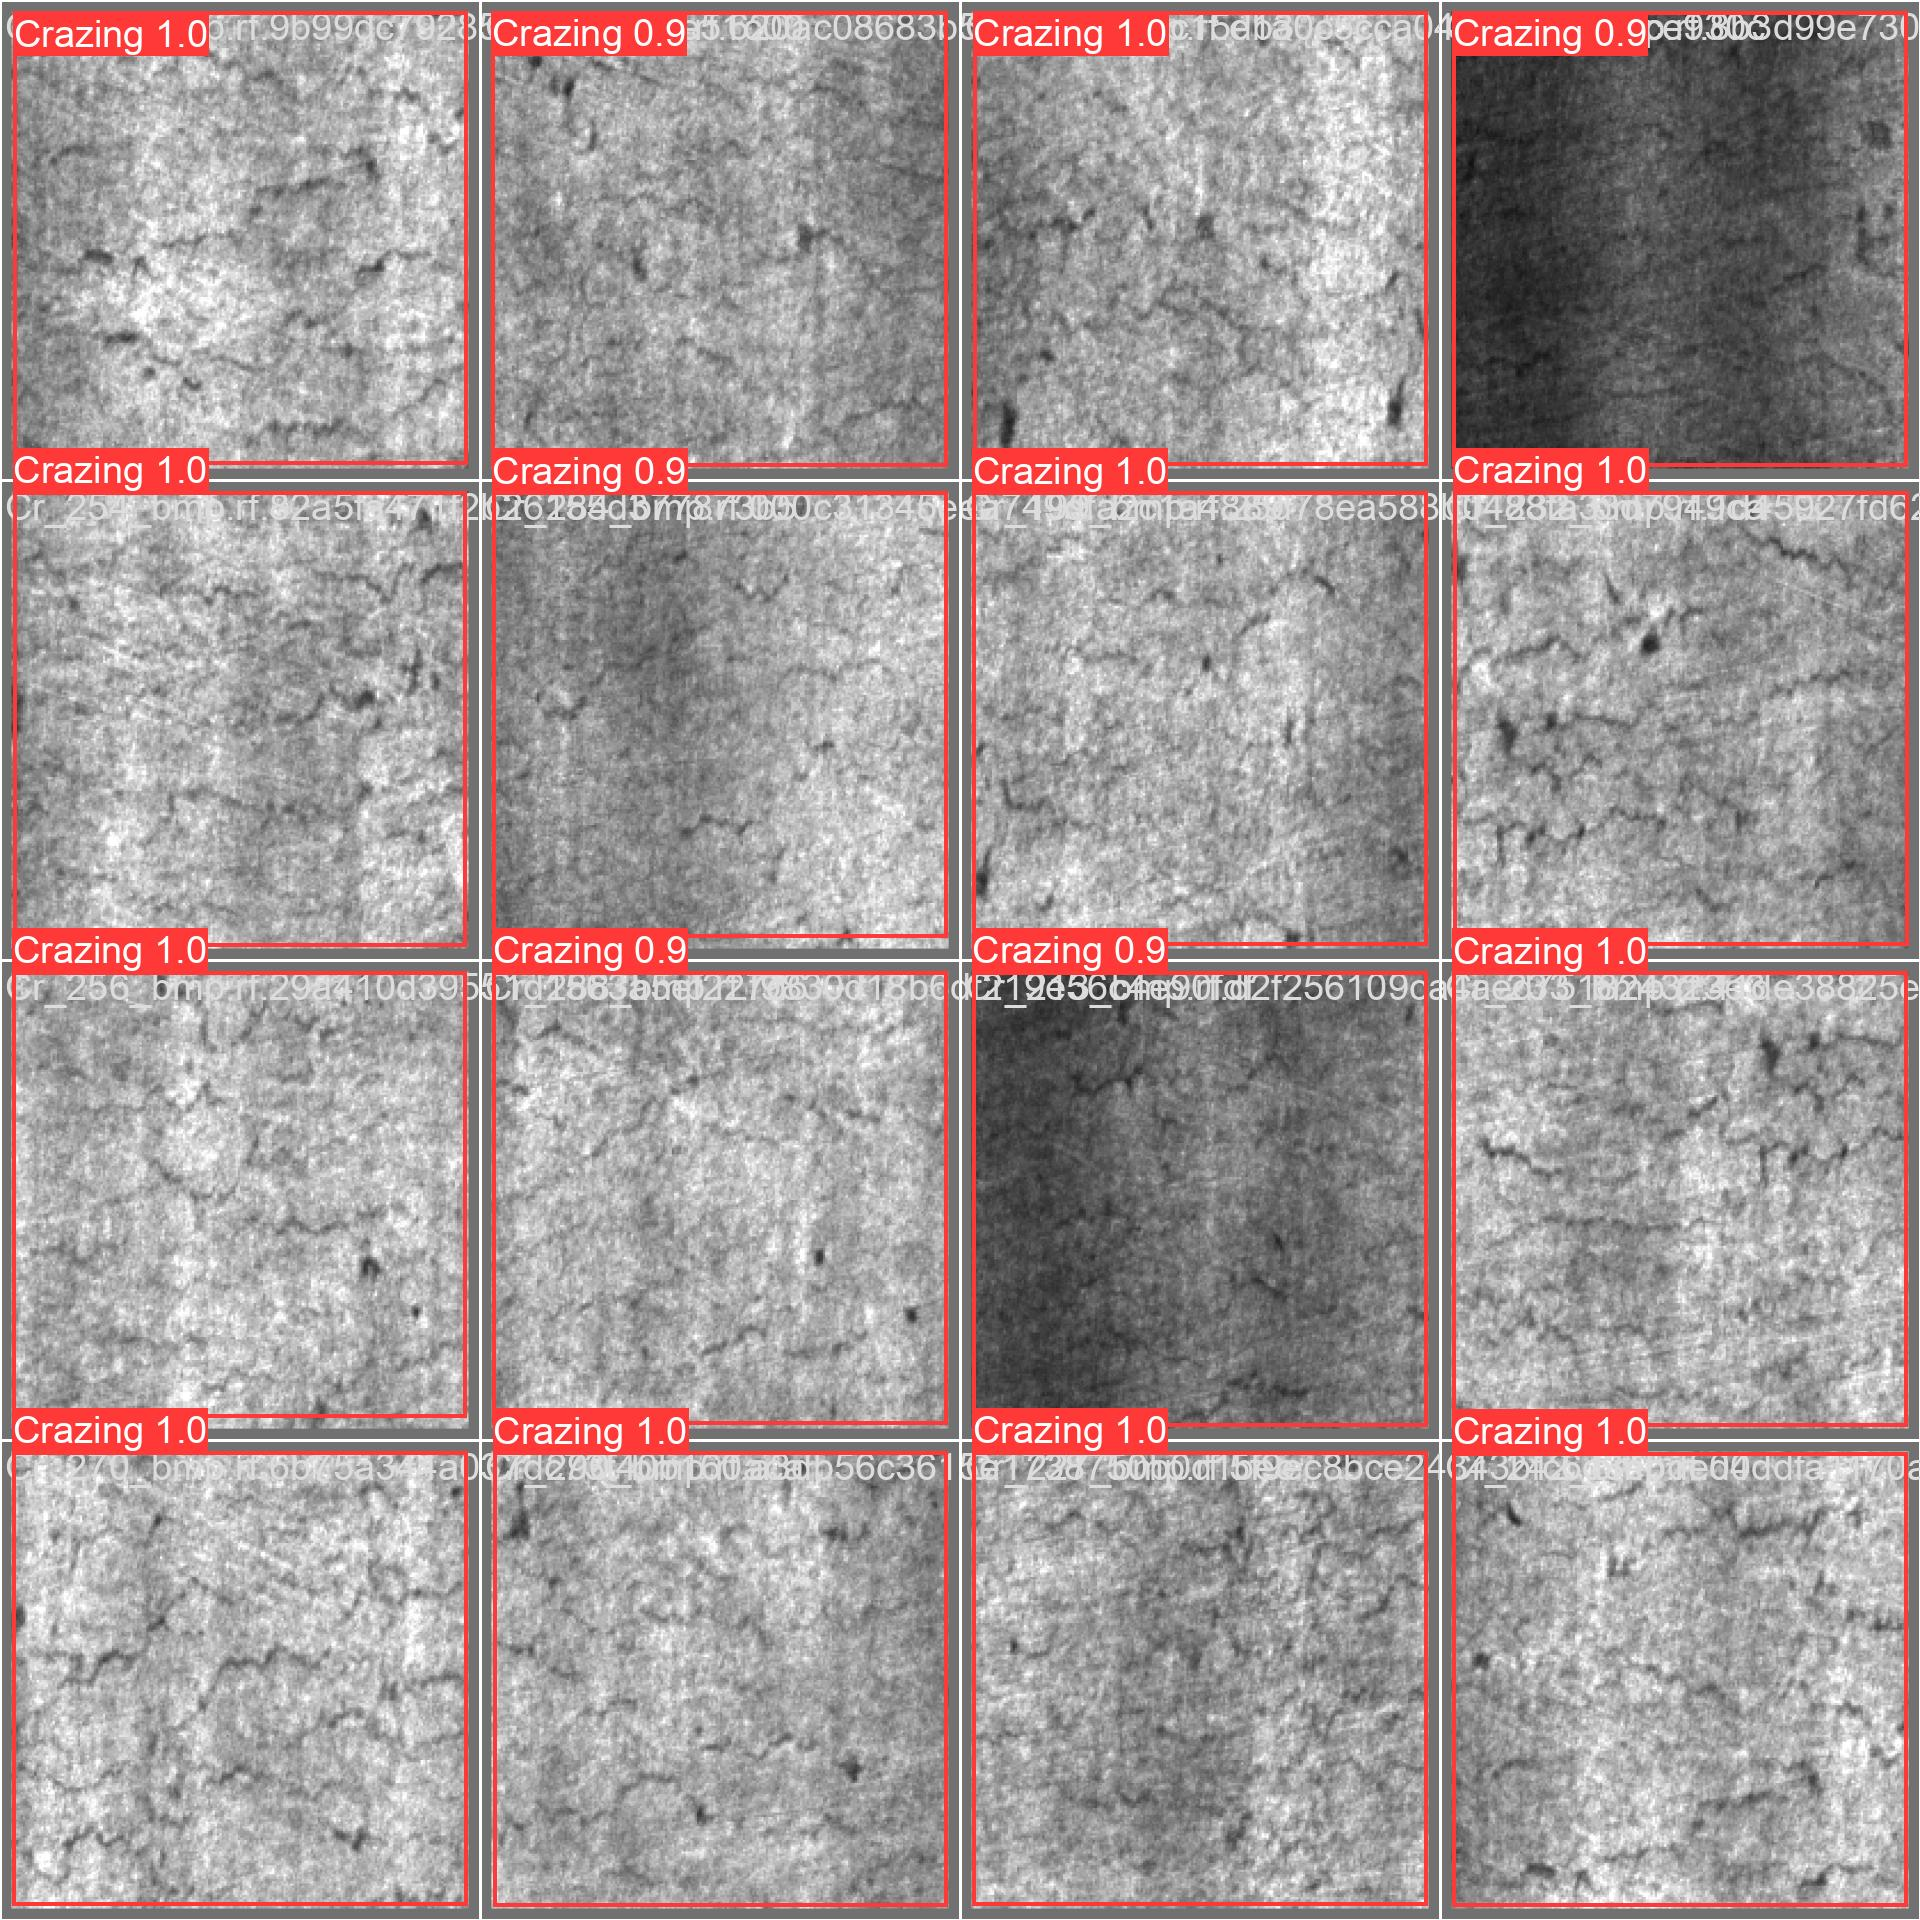

In [29]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch1_pred.jpg", width=1000)

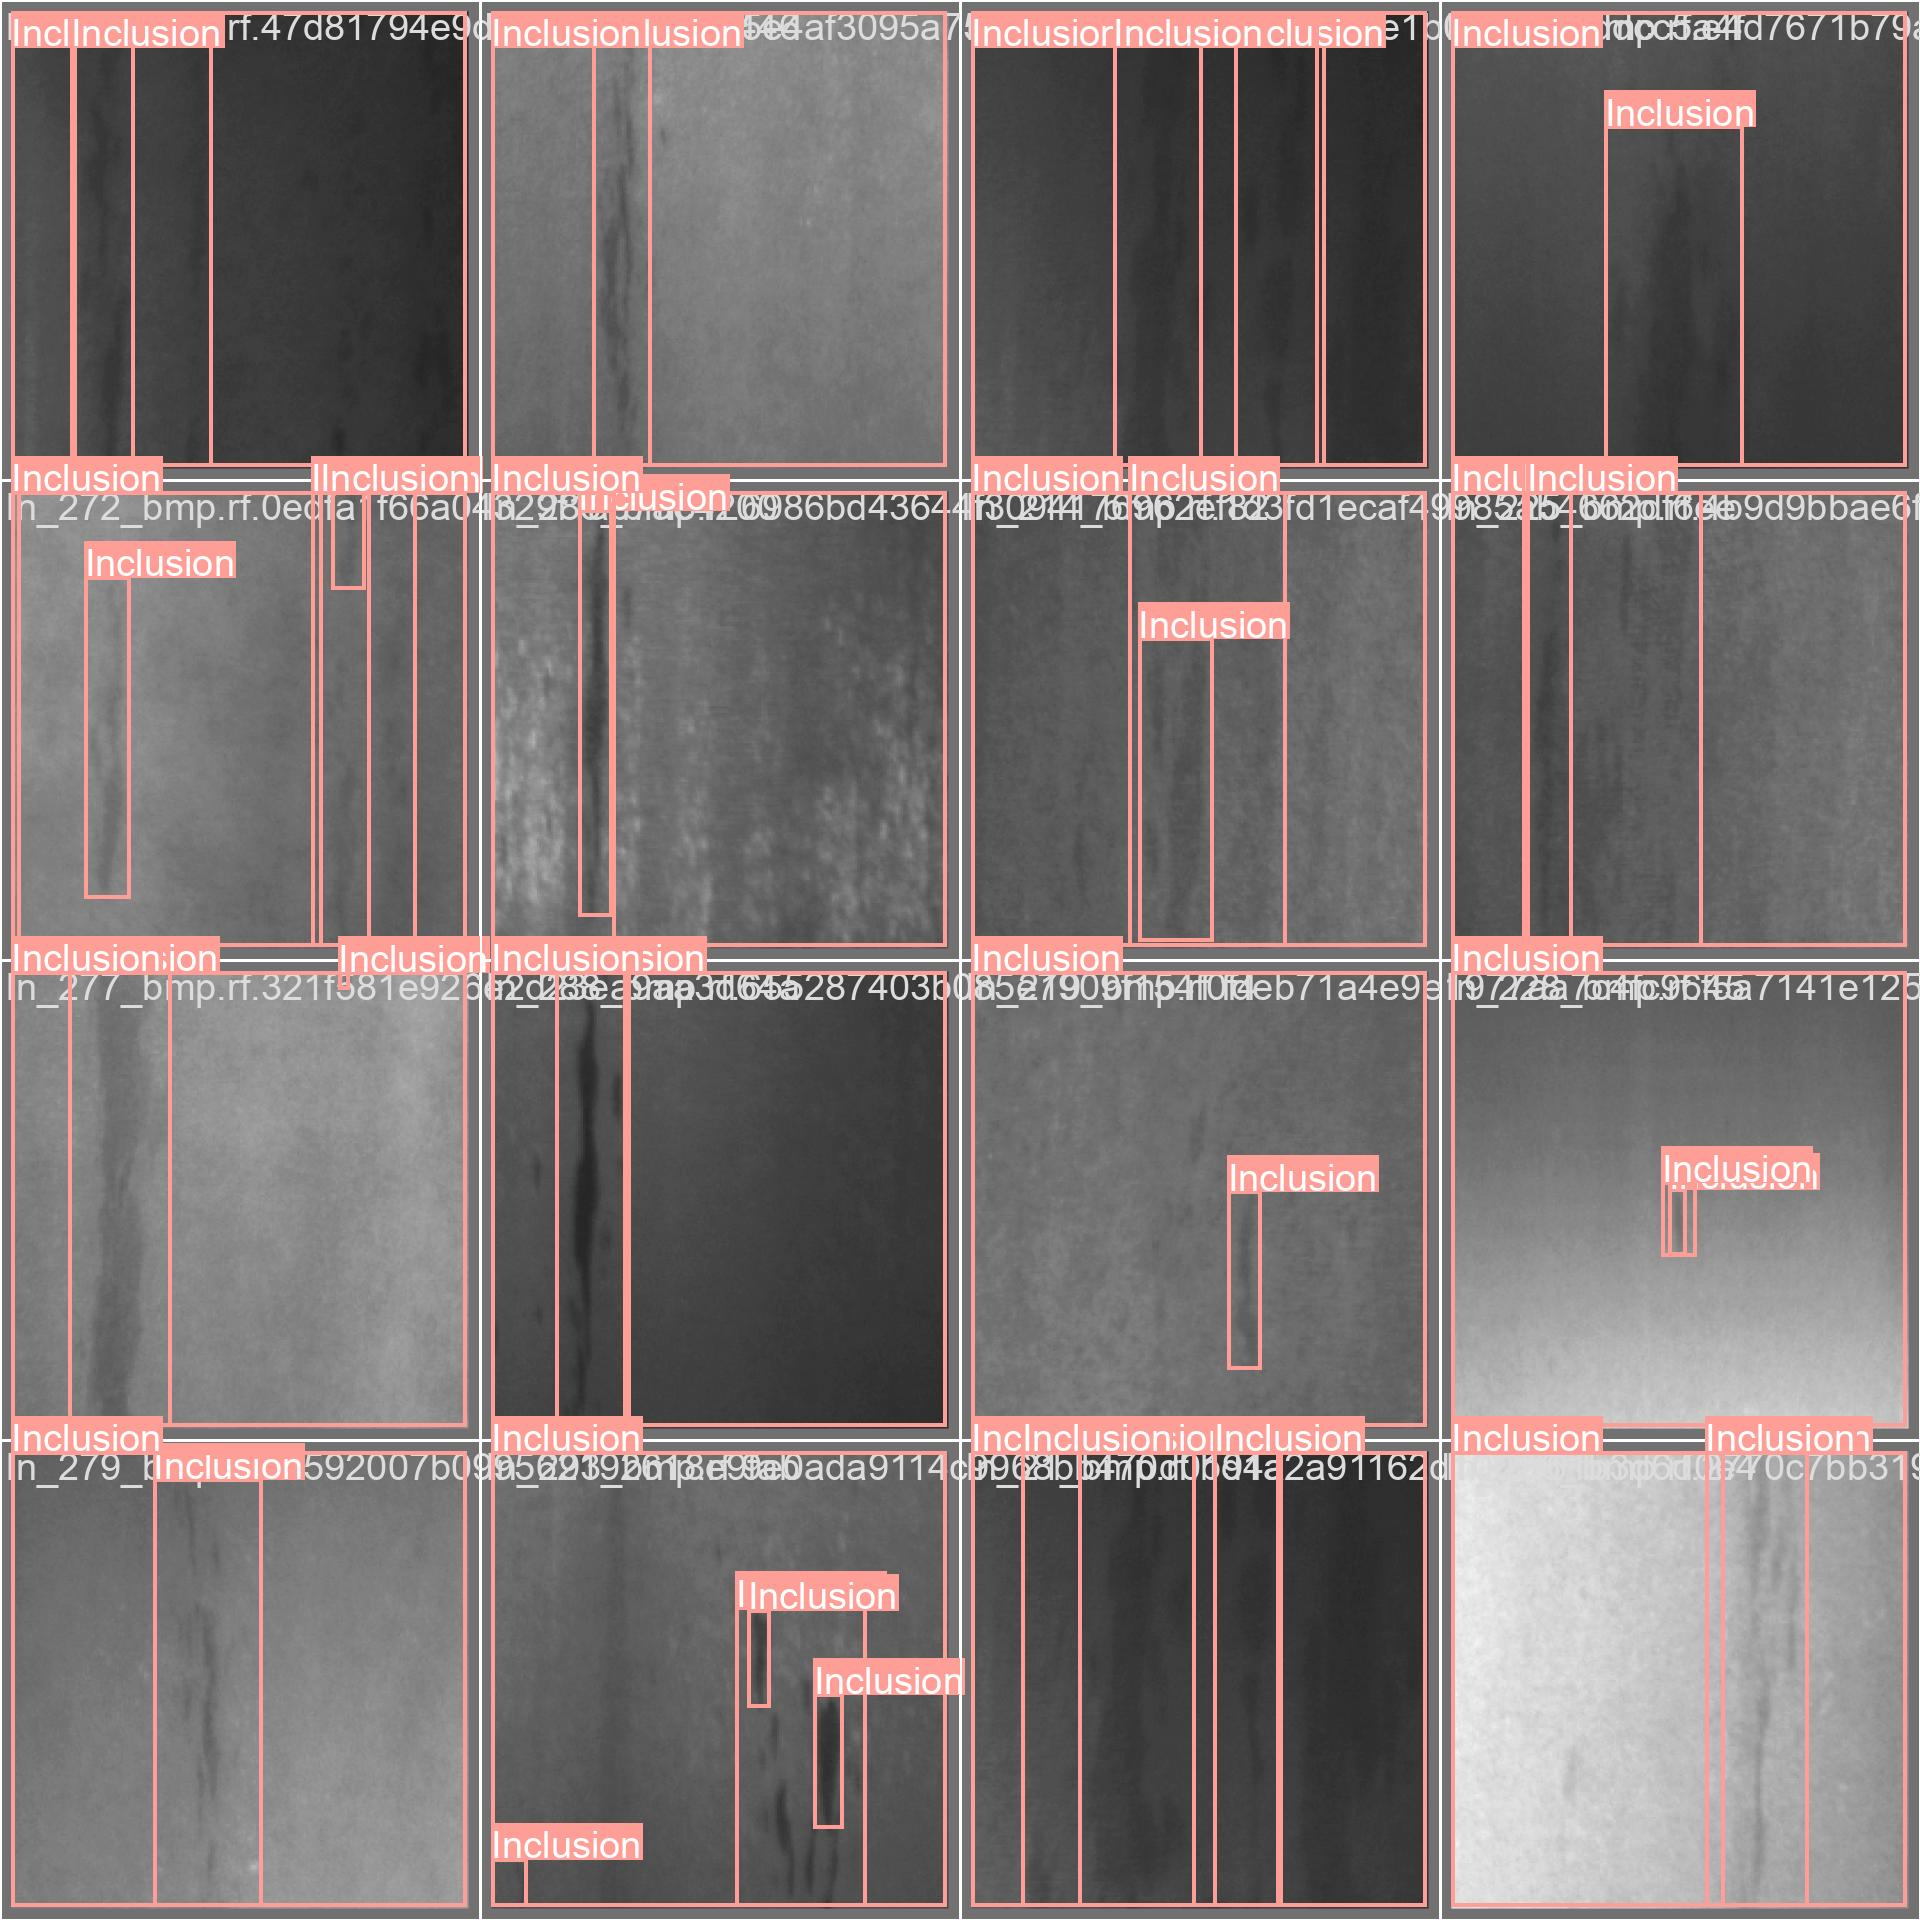

In [30]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch2_labels.jpg", width=1000)

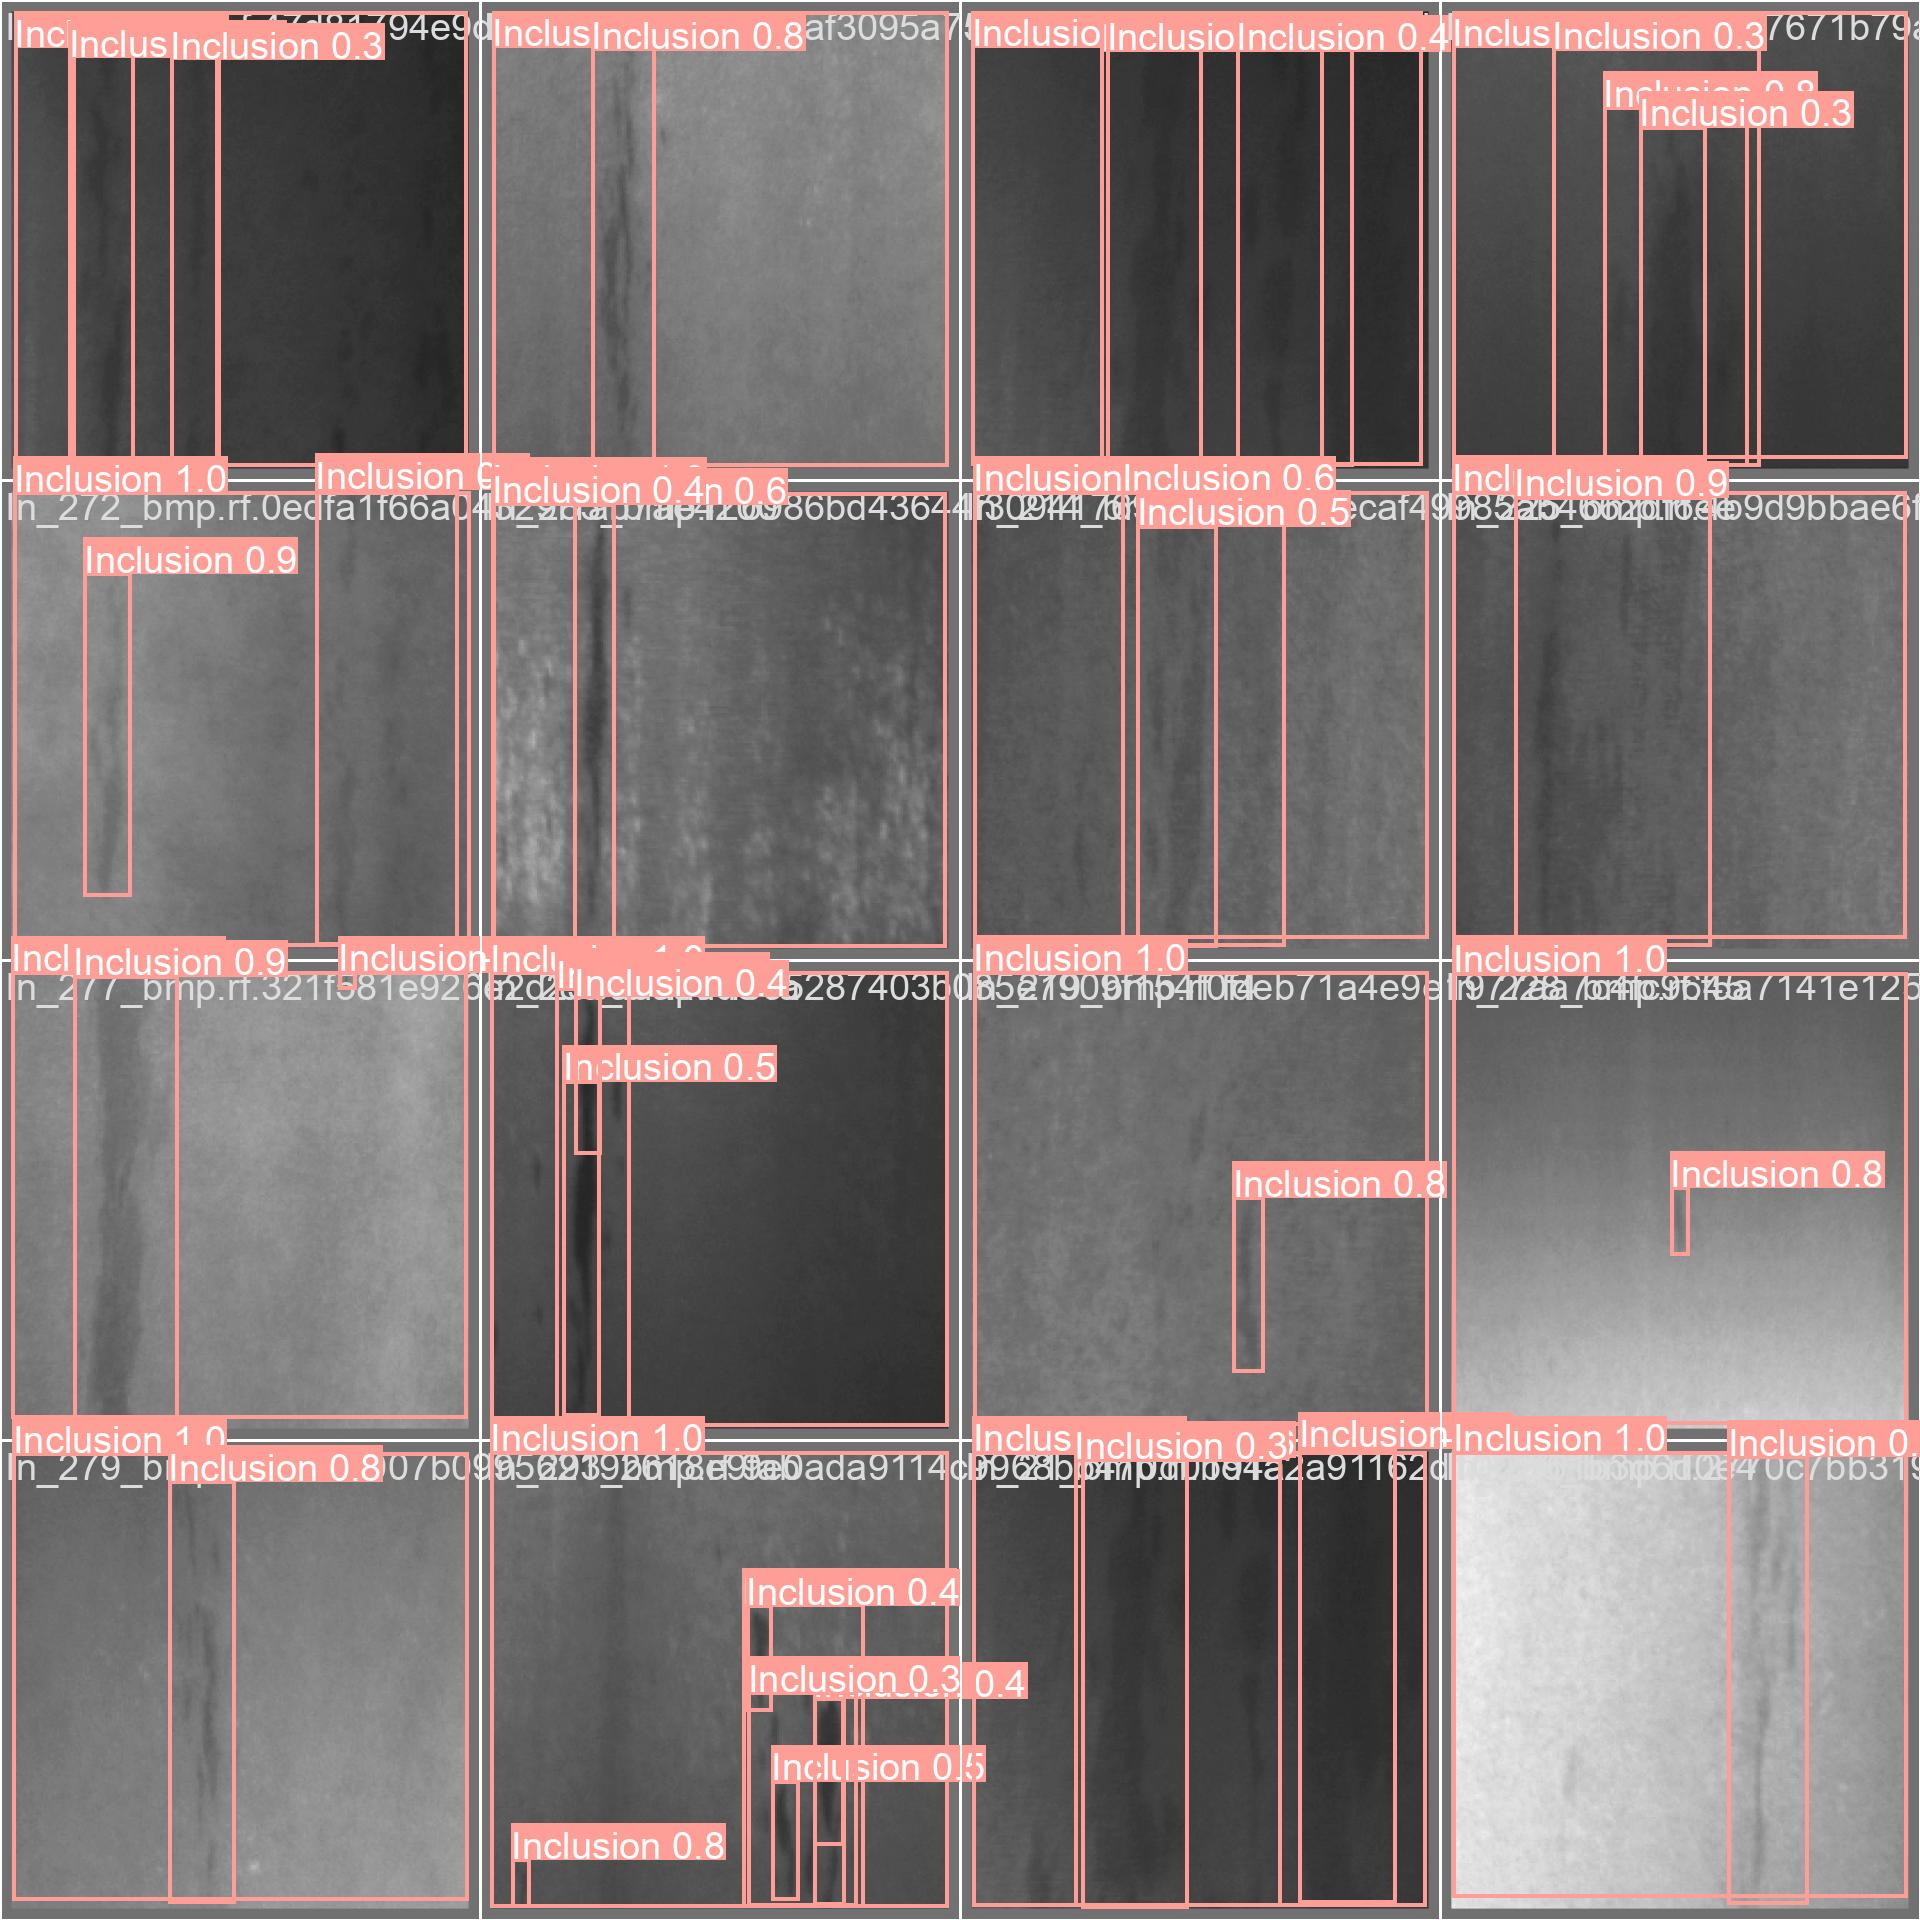

In [31]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch2_pred.jpg", width=1000)

In [32]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {HOME}/yolov9/Metal-Surface-Defects-2/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/kaggle/working/yolov9
val: data=/kaggle/working/yolov9/Metal-Surface-Defects-2/data.yaml, weights=['/kaggle/working/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25415586 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /kaggle/working/yolov9/Metal-Surface-Defects-2/valid/labels.cache.
                 Class     Images  Instances          P          R      mAP50   
                   all        330        537      0.905      0.902      0.927      0.878
               Crazing        330         53      0.959          1       0.99       0.99
             Inclusion        330   

In [33]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {HOME}/yolov9/Metal-Surface-Defects-2/test/images

detect: weights=['/kaggle/working/yolov9/runs/train/exp/weights/best.pt'], source=/kaggle/working/yolov9/Metal-Surface-Defects-2/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25415586 parameters, 0 gradients, 102.5 GFLOPs
image 1/168 /kaggle/working/yolov9/Metal-Surface-Defects-2/test/images/Cr_132_bmp.rf.7b3d467d9cfd4dcf00a5e6c7fcef89e9.jpg: 1280x1280 1 Crazing, 135.4ms
image 2/168 /kaggle/working/yolov9/Metal-Surface-Defects-2/test/images/Cr_13_bmp.rf.3869f471b50c377737fc80219f4cb059.jpg: 1280x1280 1 Crazing,

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))